In [26]:
import utils as ut

import bla
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import sys, os

In [27]:
home = os.path.expanduser("~")
project_path =  os.path.relpath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

sys.path.insert(1, project_path)
output_folder= project_path+'/outputs/'

In [28]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
%autoreload
reference_date = pd.to_datetime('2020-01-01')
syn_clade_stats = ut.get_clade_stats_dataframe('syn_clade_stats_SARS_CoV_2',reference_date=reference_date)

In [30]:

nonsyn_RBD_clade_stats = ut.get_clade_stats_dataframe('RBD_clade_stats_SARS_CoV_2',reference_date=reference_date)


In [31]:
%autoreload
df_reworked = ut.get_df_reworked(fname='fitness_france_def.txt', reference_date=reference_date)

In [32]:
from warnings import filterwarnings
filterwarnings('ignore')

In [33]:
%autoreload
covid_data_World = ut.get_covid_data_World(reference_date)
day_diff_weekly = covid_data_World['day_diff'][::7]

In [34]:
x_thresh_vals = np.array([0,1e-5,1e-4,1e-3,1e-2,1e-1])

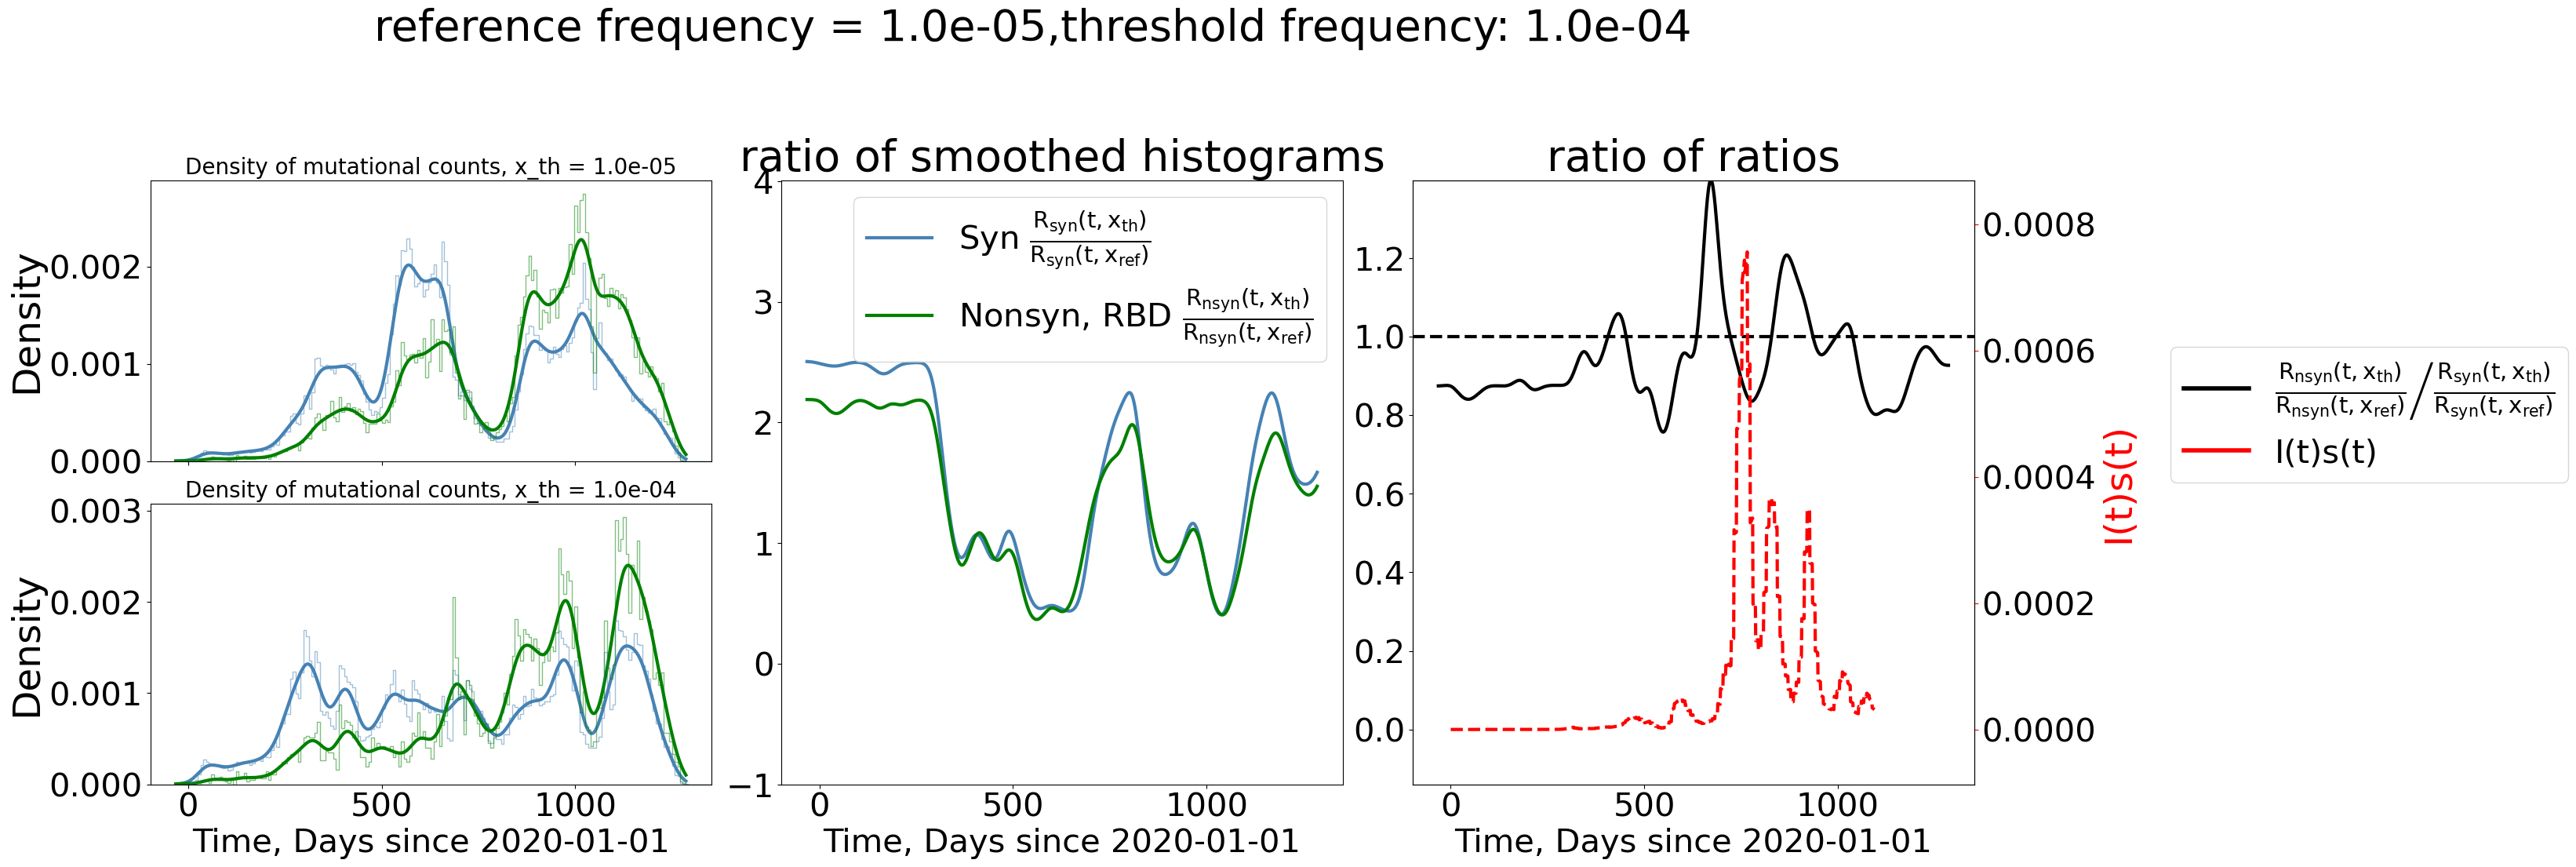

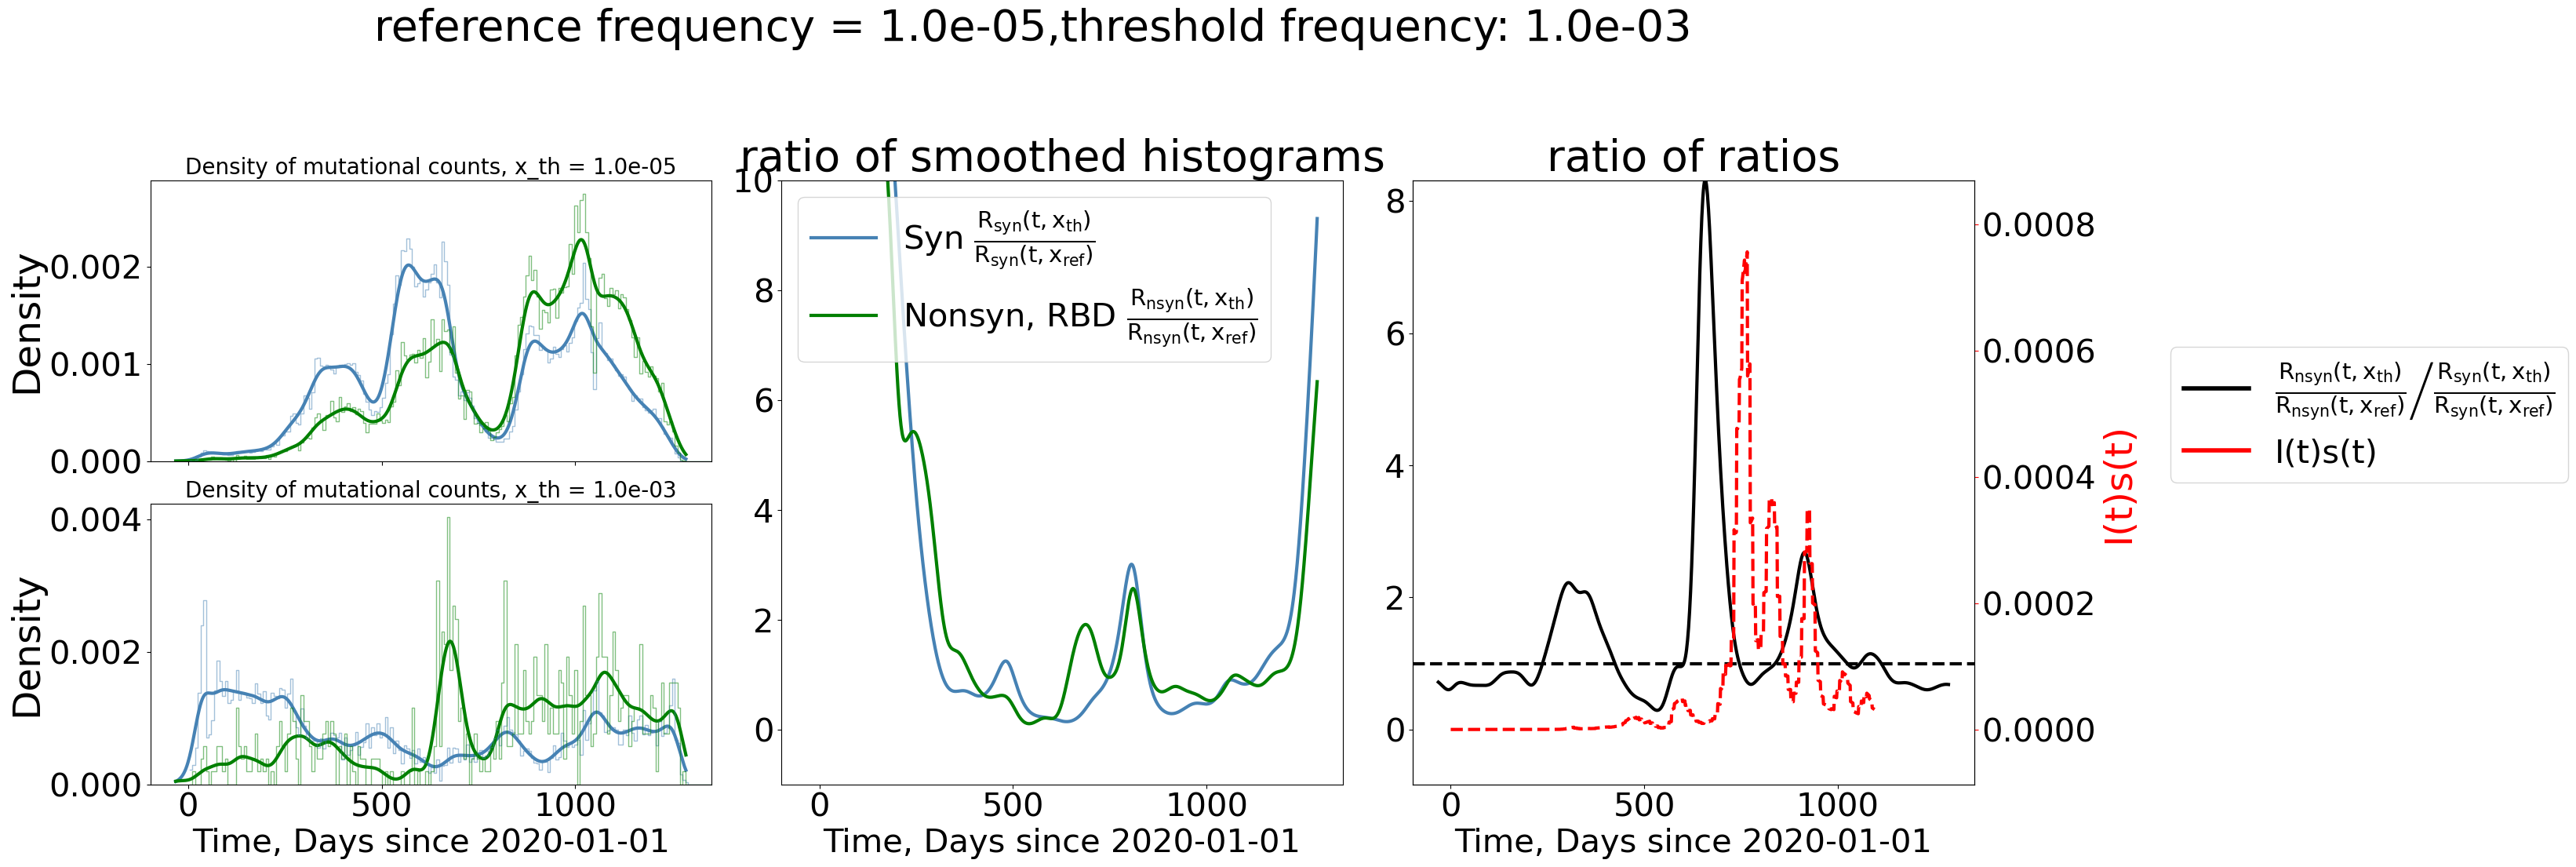

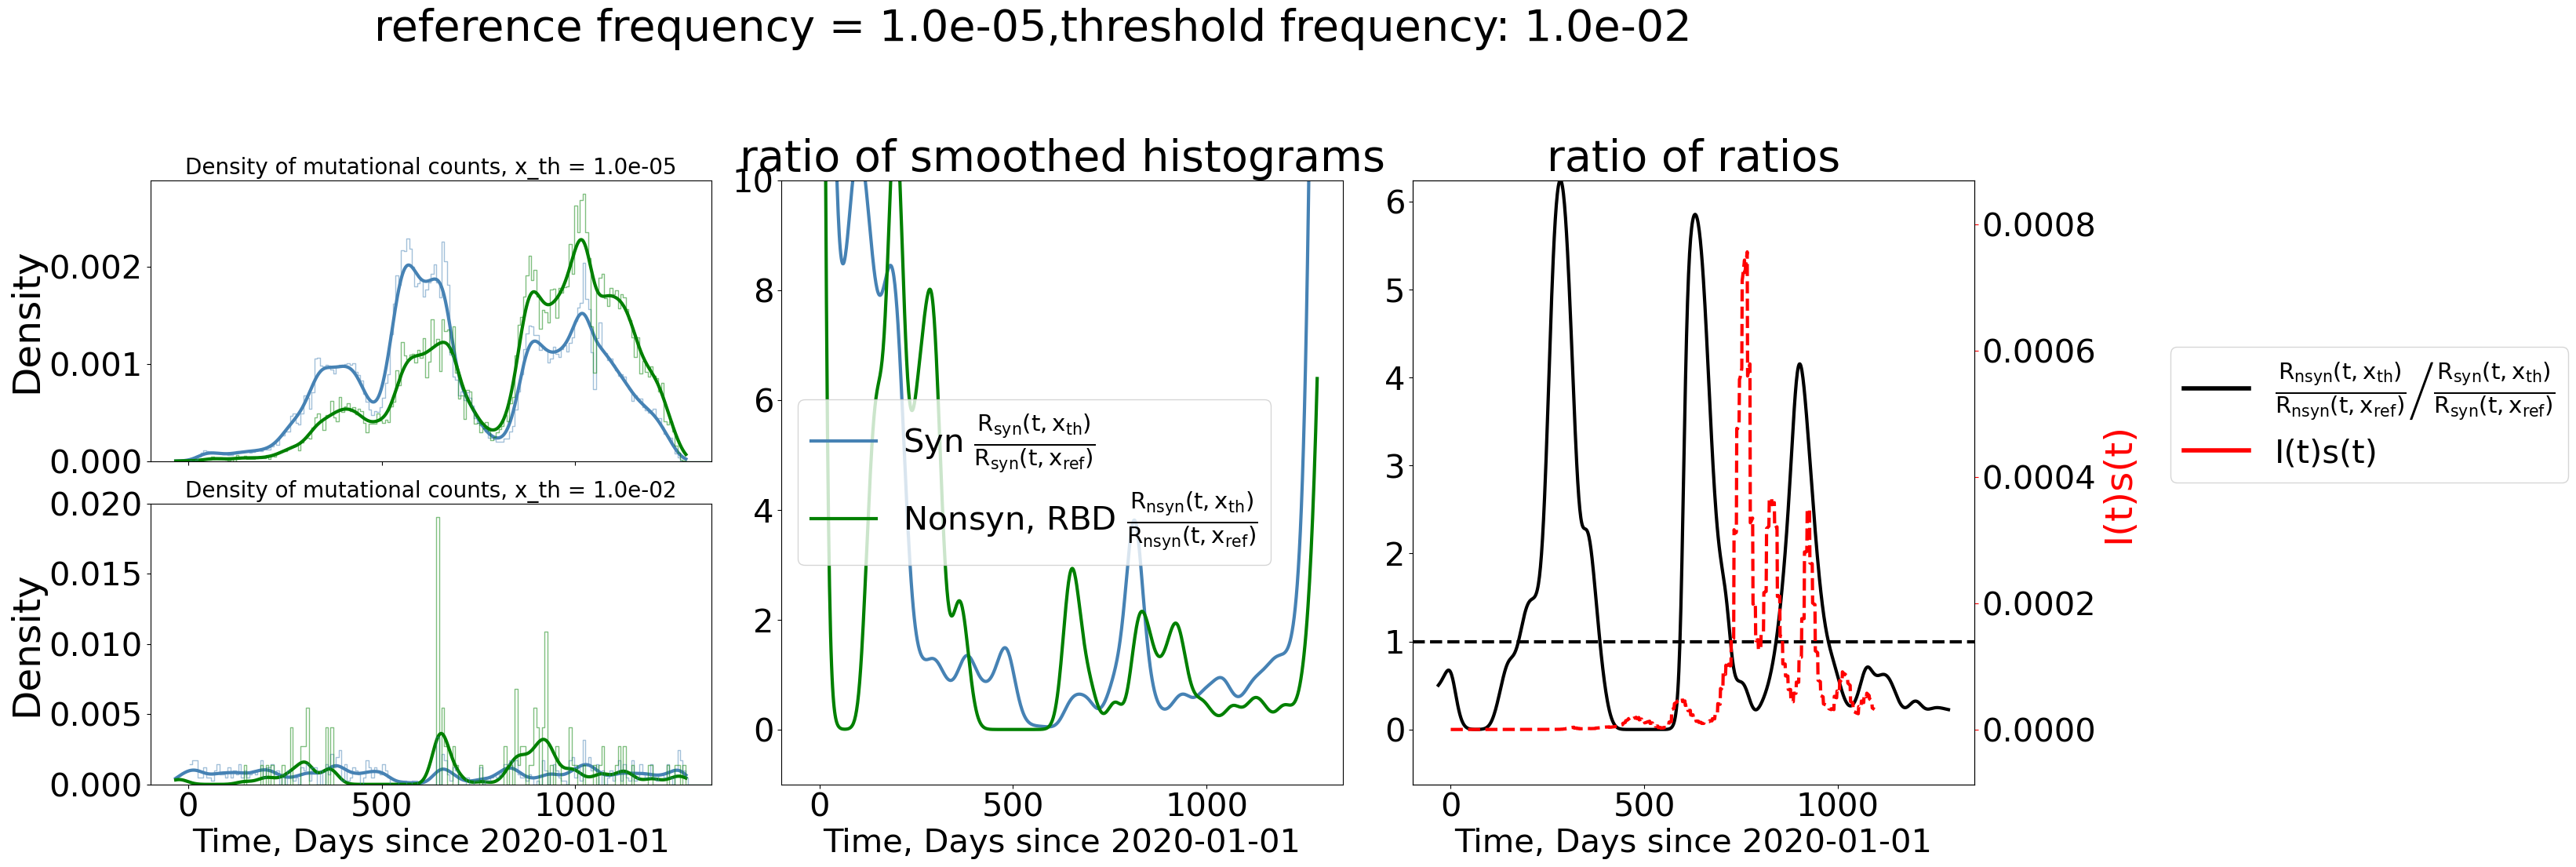

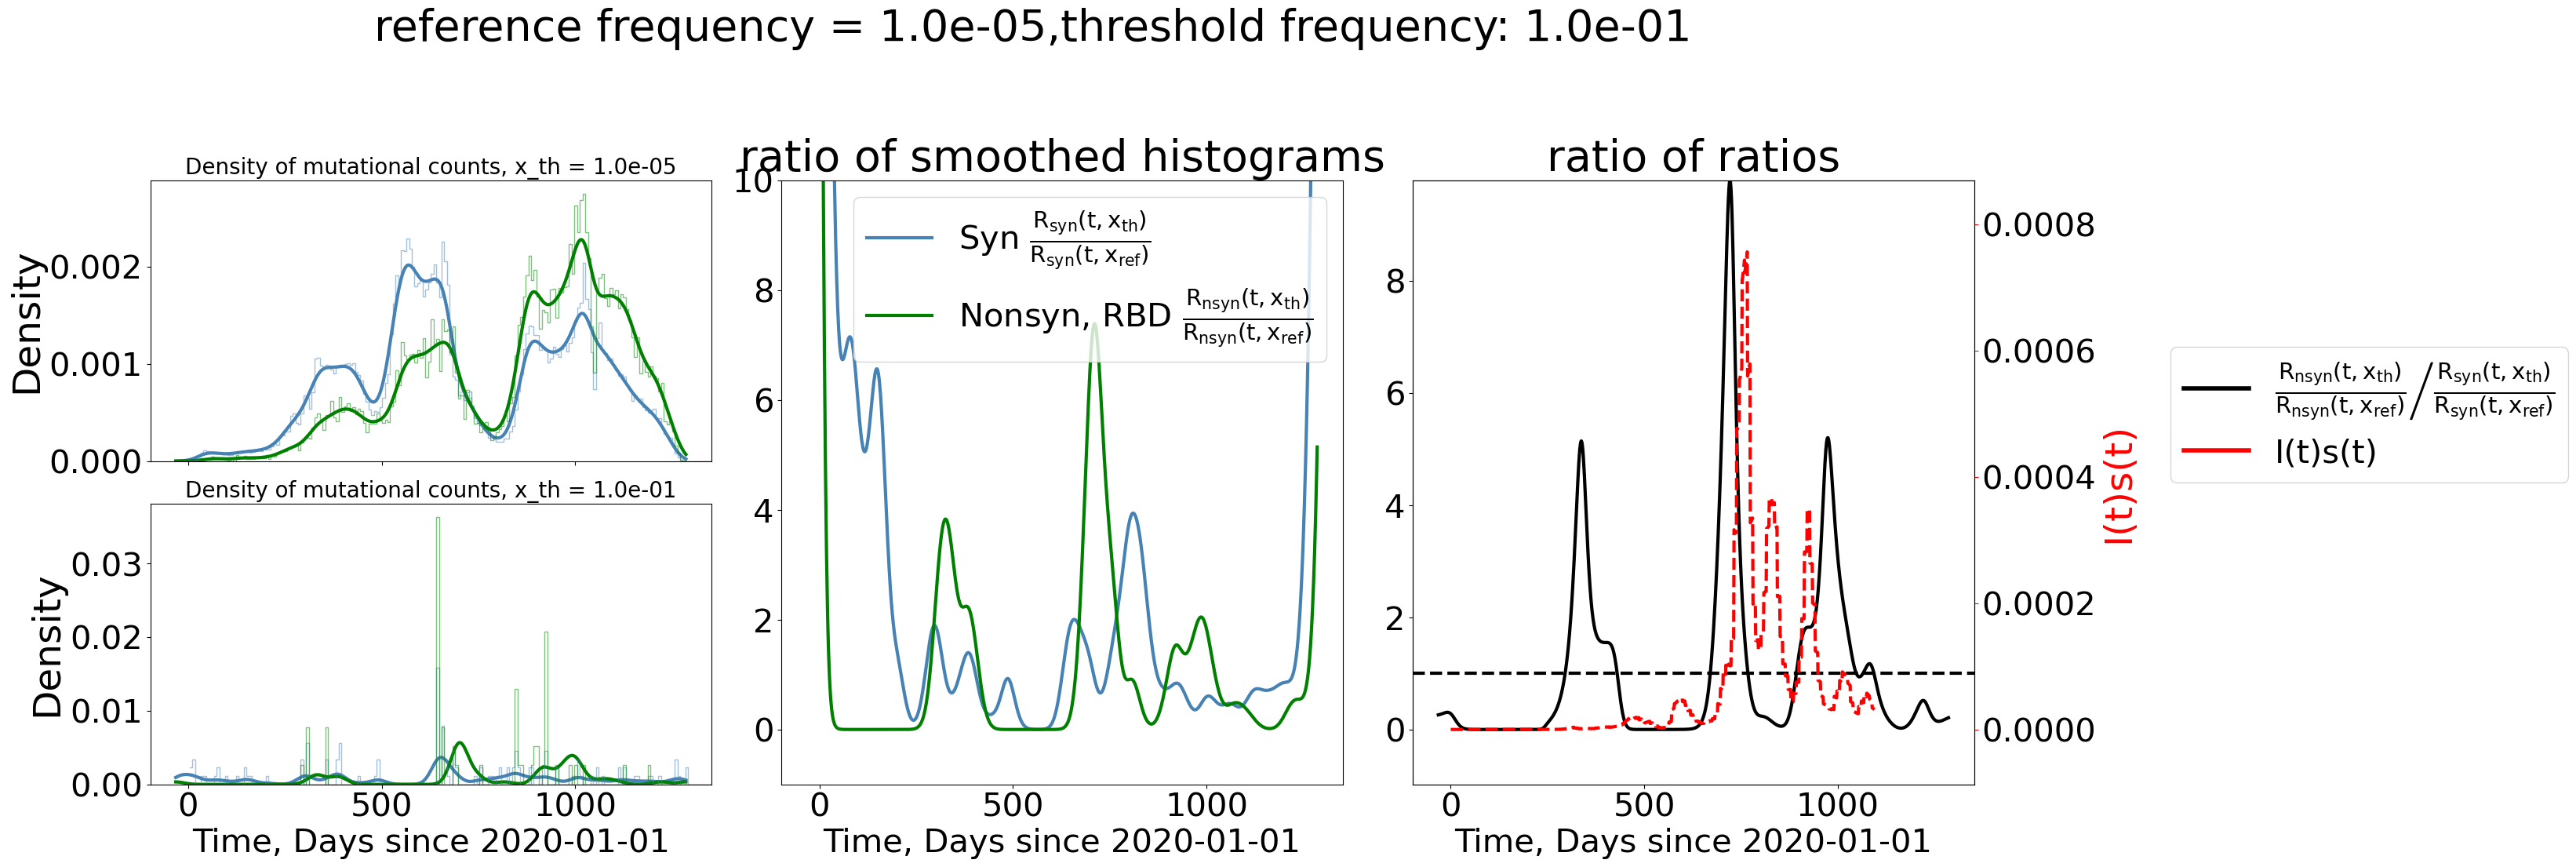

In [68]:
%autoreload

bw = 20

figure_mosaic = """
    AAACCCDDD
    BBBCCCDDD
    """

hist_ts = day_diff_weekly
day_diff_with_syn_smooth= hist_ts[:-1]

x_thresh_ref =1e-5

for x_thresh in x_thresh_vals[x_thresh_vals>x_thresh_ref]:
    fig,axes = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(30,10))
    plt.subplots_adjust(wspace=.5,hspace=.15)

    href_syn, bref_syn = np.histogram(syn_clade_stats[f'day_diff_x_bgr_{x_thresh_ref}'].dropna(),bins = hist_ts, density= False)
    hx_syn, bx_syn = np.histogram(syn_clade_stats[f'day_diff_x_bgr_{x_thresh}'].dropna(),bins = hist_ts, density= False)

    href_nonsyn_RBD, bref_nonsyn_RBD = np.histogram(nonsyn_RBD_clade_stats[f'day_diff_x_bgr_{x_thresh_ref}'].dropna(),bins = hist_ts, density= False)
    
    hx_nonsyn_RBD, bx_nonsyn_RBD = np.histogram(nonsyn_RBD_clade_stats[f'day_diff_x_bgr_{x_thresh}'].dropna(),bins = hist_ts, density= False)

    ratio_nonsyn_RBD = hx_nonsyn_RBD/href_nonsyn_RBD
    ratio_syn = hx_syn/href_syn

    day_diff_with_syn_smooth, smoothed_href_syn = ut.get_kde( syn_clade_stats.query(f'Max_Freq > {x_thresh_ref}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)
    day_diff_with_nonsyn_RBD_smooth, smoothed_href_nonsyn_RBD = ut.get_kde( nonsyn_RBD_clade_stats.query(f'Max_Freq > {x_thresh_ref}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)

    day_diff_with_syn_smooth, smoothed_hx_syn = ut.get_kde( syn_clade_stats.query(f'Max_Freq > {x_thresh}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)
    day_diff_with_nonsyn_RBD_smooth, smoothed_hx_nonsyn_RBD = ut.get_kde( nonsyn_RBD_clade_stats.query(f'Max_Freq > {x_thresh}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)

    smoothed_ratio_nonsyn_RBD = smoothed_hx_nonsyn_RBD/smoothed_href_nonsyn_RBD
    smoothed_ratio_syn = smoothed_hx_syn/smoothed_href_syn

    ax_densities_0 = axes['A']
    ax_densities_x_thresh = axes['B']

    ax_densities_0.plot(day_diff_with_syn_smooth, smoothed_href_syn/np.trapz(smoothed_href_syn,day_diff_with_syn_smooth),color='steelblue')
    ax_densities_0.plot(day_diff_with_syn_smooth, smoothed_href_nonsyn_RBD/np.trapz(smoothed_href_nonsyn_RBD,day_diff_with_syn_smooth),color='green')

    ax_densities_x_thresh.plot(day_diff_with_syn_smooth, smoothed_hx_syn/np.trapz(smoothed_hx_syn,day_diff_with_syn_smooth),color='steelblue')    
    ax_densities_x_thresh.plot(day_diff_with_syn_smooth, smoothed_hx_nonsyn_RBD/np.trapz(smoothed_hx_nonsyn_RBD,day_diff_with_syn_smooth),color='green')

    sns.histplot(syn_clade_stats.query(f'Max_Freq > {x_thresh_ref}')['day_diff'],bins = hist_ts, label = 'Synonymous',alpha=0.5, color='steelblue',ax=ax_densities_0,element='step', fill=False, stat='density', lw=1)
    sns.histplot(nonsyn_RBD_clade_stats.query(f'Max_Freq > {x_thresh_ref}')['day_diff'],bins = hist_ts, label = 'RBD',alpha=0.5, color='green',ax=ax_densities_0,element='step', fill=False, stat='density', lw=1)

    sns.histplot(syn_clade_stats.query(f'Max_Freq > {x_thresh}')['day_diff'],bins = hist_ts, label = 'Synonymous',alpha=0.5, color='steelblue',ax=ax_densities_x_thresh,element='step', fill=False, stat='density', lw=1)
    sns.histplot(nonsyn_RBD_clade_stats.query(f'Max_Freq > {x_thresh}')['day_diff'],bins = hist_ts, label = 'RBD',alpha=0.5, color='green',ax=ax_densities_x_thresh,element='step', fill=False, stat='density', lw=1)
    
    axes['A'].set_xticklabels('')
    axes['A'].set_xlabel('')

    plot_ratio = True
    if plot_ratio:
        ax_ratio = axes['C']
        # ax_ratio.plot(hist_ts, ratio_syn, color='steelblue',alpha=.5)
        # ax_ratio.plot(hist_ts, ratio_nonsyn_RBD, color='green',alpha=.5)
        ax_ratio.plot(day_diff_with_syn_smooth, smoothed_ratio_syn, color='steelblue', label = 'Syn ' + r'$\frac{R_{syn}(t,x_\mathrm{th})}{R_{syn}(t,x_\mathrm{ref})}$')
        ax_ratio.plot(day_diff_with_syn_smooth, smoothed_ratio_nonsyn_RBD, color='green', label = 'Nonsyn, RBD ' + r'$\frac{R_{nsyn}(t,x_\mathrm{th})}{R_{nsyn}(t,x_\mathrm{ref})}$')

    plot_ratio_of_ratios = True
    if plot_ratio_of_ratios:
        ax_ratio_of_ratios = axes['D']
        # ax_ratio_of_ratios.plot(hist_ts, ratio_nonsyn_RBD/ratio_syn,alpha=.5, color='black')
        ax_ratio_of_ratios.plot(day_diff_with_syn_smooth, smoothed_ratio_nonsyn_RBD/smoothed_ratio_syn,color= 'black', label = r'$\left.\frac{R_{nsyn}(t,x_\mathrm{th})}{R_{nsyn}(t,x_\mathrm{ref})}\middle/\frac{R_{syn}(t,x_\mathrm{th})}{R_{syn}(t,x_\mathrm{ref})}\right.$' )
        ax_ratio_of_ratios.axhline(1,color='k',ls='--')

    
    tax_D= axes['D'].twinx()
    # tax_D.plot(day_diff, cases*avg_pot_selection,color='red')
    df_reworked.groupby(['day_diff']).apply(lambda x: np.sum(x['cases']*x['freq']*x['pot_selection'])).plot(color='red',ax=tax_D,ls= '--')

    # tax_D.plot(day_diff[:-20], cases[:-20],color='orange')
    tax_D.grid(False)
    tax_D.tick_params(color='red')
    tax_D.set_ylabel('I(t)s(t)',color='red')
    tax_D_max = 1.15*np.max(df_reworked.groupby(['day_diff']).apply(lambda x: np.sum(x['cases']*x['freq']*x['pot_selection'])).values)
    tax_D.set_ylim(top = tax_D_max,bottom = -.1*tax_D_max)
    
    fig.suptitle(f'reference frequency = {x_thresh_ref:.1e},threshold frequency: {x_thresh:.1e}',y=1.1)

    for ax_label in['B',"C",'D']:
        axes[ax_label].set_xlabel('Time, Days since 2020-01-01',fontsize=30)

    for a in axes:
        axes[a].tick_params(labelsize=30)


    # ax_ratio.set_ylim(top=np.min((20,1.5*np.max((ratio_syn[~np.isnan(ratio_syn)].max(),ratio_nonsyn_RBD[~np.isnan(ratio_nonsyn_RBD)].max())))),bottom=-1)

    axes['A'].set_title(f'Density of mutational counts, x_th = {x_thresh_ref:.1e}',fontsize=20)
    axes['B'].set_title(f'Density of mutational counts, x_th = {x_thresh:.1e}',fontsize=20)

    axes['C'].set_title('ratio of smoothed histograms')
    axes['D'].set_title('ratio of ratios')

    axes['C'].legend(loc='best',fontsize=30)

    handles_D = [
    Line2D([0], [0], color='black', lw=4, label=r'$\left.\frac{R_{nsyn}(t,x_\mathrm{th})}{R_{nsyn}(t,x_\mathrm{ref})}\middle/\frac{R_{syn}(t,x_\mathrm{th})}{R_{syn}(t,x_\mathrm{ref})}\right.$'),
    Line2D([0], [0], color='red', lw=4, label='I(t)s(t)'),   
    ]
    ratio_of_ratios = smoothed_ratio_nonsyn_RBD/smoothed_ratio_syn
    mmax =np.max(ratio_of_ratios[np.logical_and(~np.isnan(ratio_of_ratios),~np.isinf(ratio_of_ratios))] [:-20])

    axes['D'].legend(handles = handles_D, loc=(1.35,.5),fontsize=30)
    axes['D'].set_ylim(top=mmax,bottom=-.1*mmax)

    mmax_C = np.max((smoothed_ratio_syn.max(),smoothed_ratio_nonsyn_RBD.max()))
    # print(mmax_C)
    axes['C'].set_ylim(top=np.min((1.6*mmax_C,10)),bottom=-1)

    axes['A'].set_xlim(axes['D'].get_xlim())
    axes['B'].set_xlim(axes['D'].get_xlim())

    # savefig=1
    # if savefig:
    #     os.makedirs(output_folder+f'/kde_data_analysis_Is_t_est_{x_thresh_ref}_bw{bw}/',exist_ok = True)
    #     fig.savefig(output_folder+f'/kde_data_analysis_Is_t_est_{x_thresh_ref}_bw{bw}/'+f'multiplot_ratios_x_th{x_thresh:.1e}_xref_{x_thresh_ref:.1e}.pdf',bbox_inches='tight')


    


In [62]:
wt_alpha_crossover_date = pd.to_datetime('2021-03-15')
alpha_delta_crossover_date = pd.to_datetime('2021-06-21')
delta_ba1_crossover_date = pd.to_datetime('2022-01-03')
ba1_ba2_crossover_date = pd.to_datetime('2022-01-31')
ba2_ba5_crossover_date = pd.to_datetime('2022-06-06')
ba5_xbb_crossover_date = pd.to_datetime('2023-02-27')

wt_alpha_crossover_label = 'WT to Alpha'
alpha_delta_crossover_label = 'Alpha to Delta'
delta_ba1_crossover_label = 'Delta to BA.1'
ba1_ba2_crossover_label = 'BA.1 to BA.2'
ba2_ba5_crossover_label = 'BA.2 to BA.5'
ba5_xbb_crossover_label = 'BA.5 to xBB'

crossover_dates = [alpha_delta_crossover_date,delta_ba1_crossover_date,ba2_ba5_crossover_date, ba5_xbb_crossover_date]
crossover_labels = [alpha_delta_crossover_label,delta_ba1_crossover_label,ba2_ba5_crossover_label, ba5_xbb_crossover_label]

In [37]:
# easy_clade_names = {'B.1.1.7':'Alpha','B.1.351':'Beta','P.1':'Gamma','B.1.617.2':'Delta','B.1.1.529':'Omicron'}

In [38]:
df_reworked['is_majority_clade'] = df_reworked.groupby('day_diff')['freq'].transform(lambda x: x>0.5)

In [39]:
#rename clade B.1.1.7 to Alpha and B.1.617.2 to Delta
df_reworked['clade'] = df_reworked['clade'].replace({'B.1.1.7':'Alpha','B.1.617.2':'Delta','B.1.351':'Beta','P.1':'Gamma','B.1.1.529':'Omicron'})

In [40]:
df_reworked.clade.unique()

array(['WT', 'Delta', 'Alpha', 'BA.1', 'BA.2', 'BA.5', 'JN.1', 'JN.1.4',
       'BF.7', 'XBB.1.5', 'XBB.1.16', 'HK.3'], dtype=object)

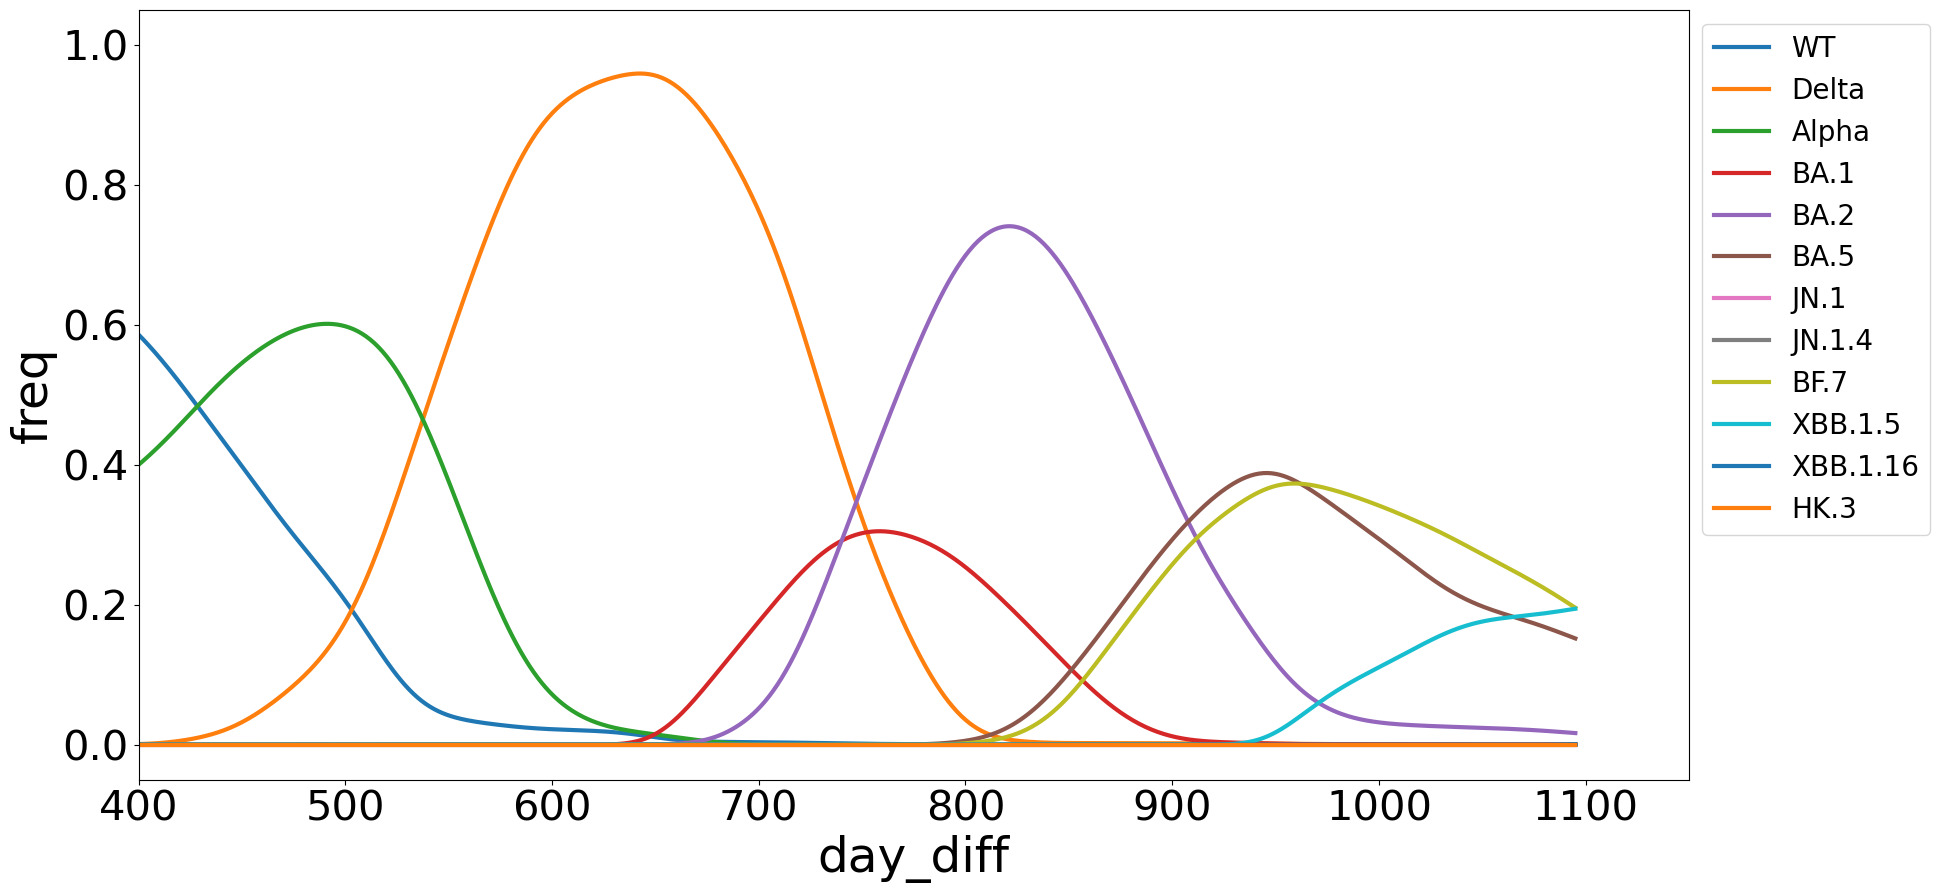

In [72]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_reworked,x='day_diff',y='freq',hue='clade',markers=True, dashes=False,palette='tab10')
ax.set_xlim(left= 400),
ax.legend(loc='upper left',fontsize=20,bbox_to_anchor=(1,1))   

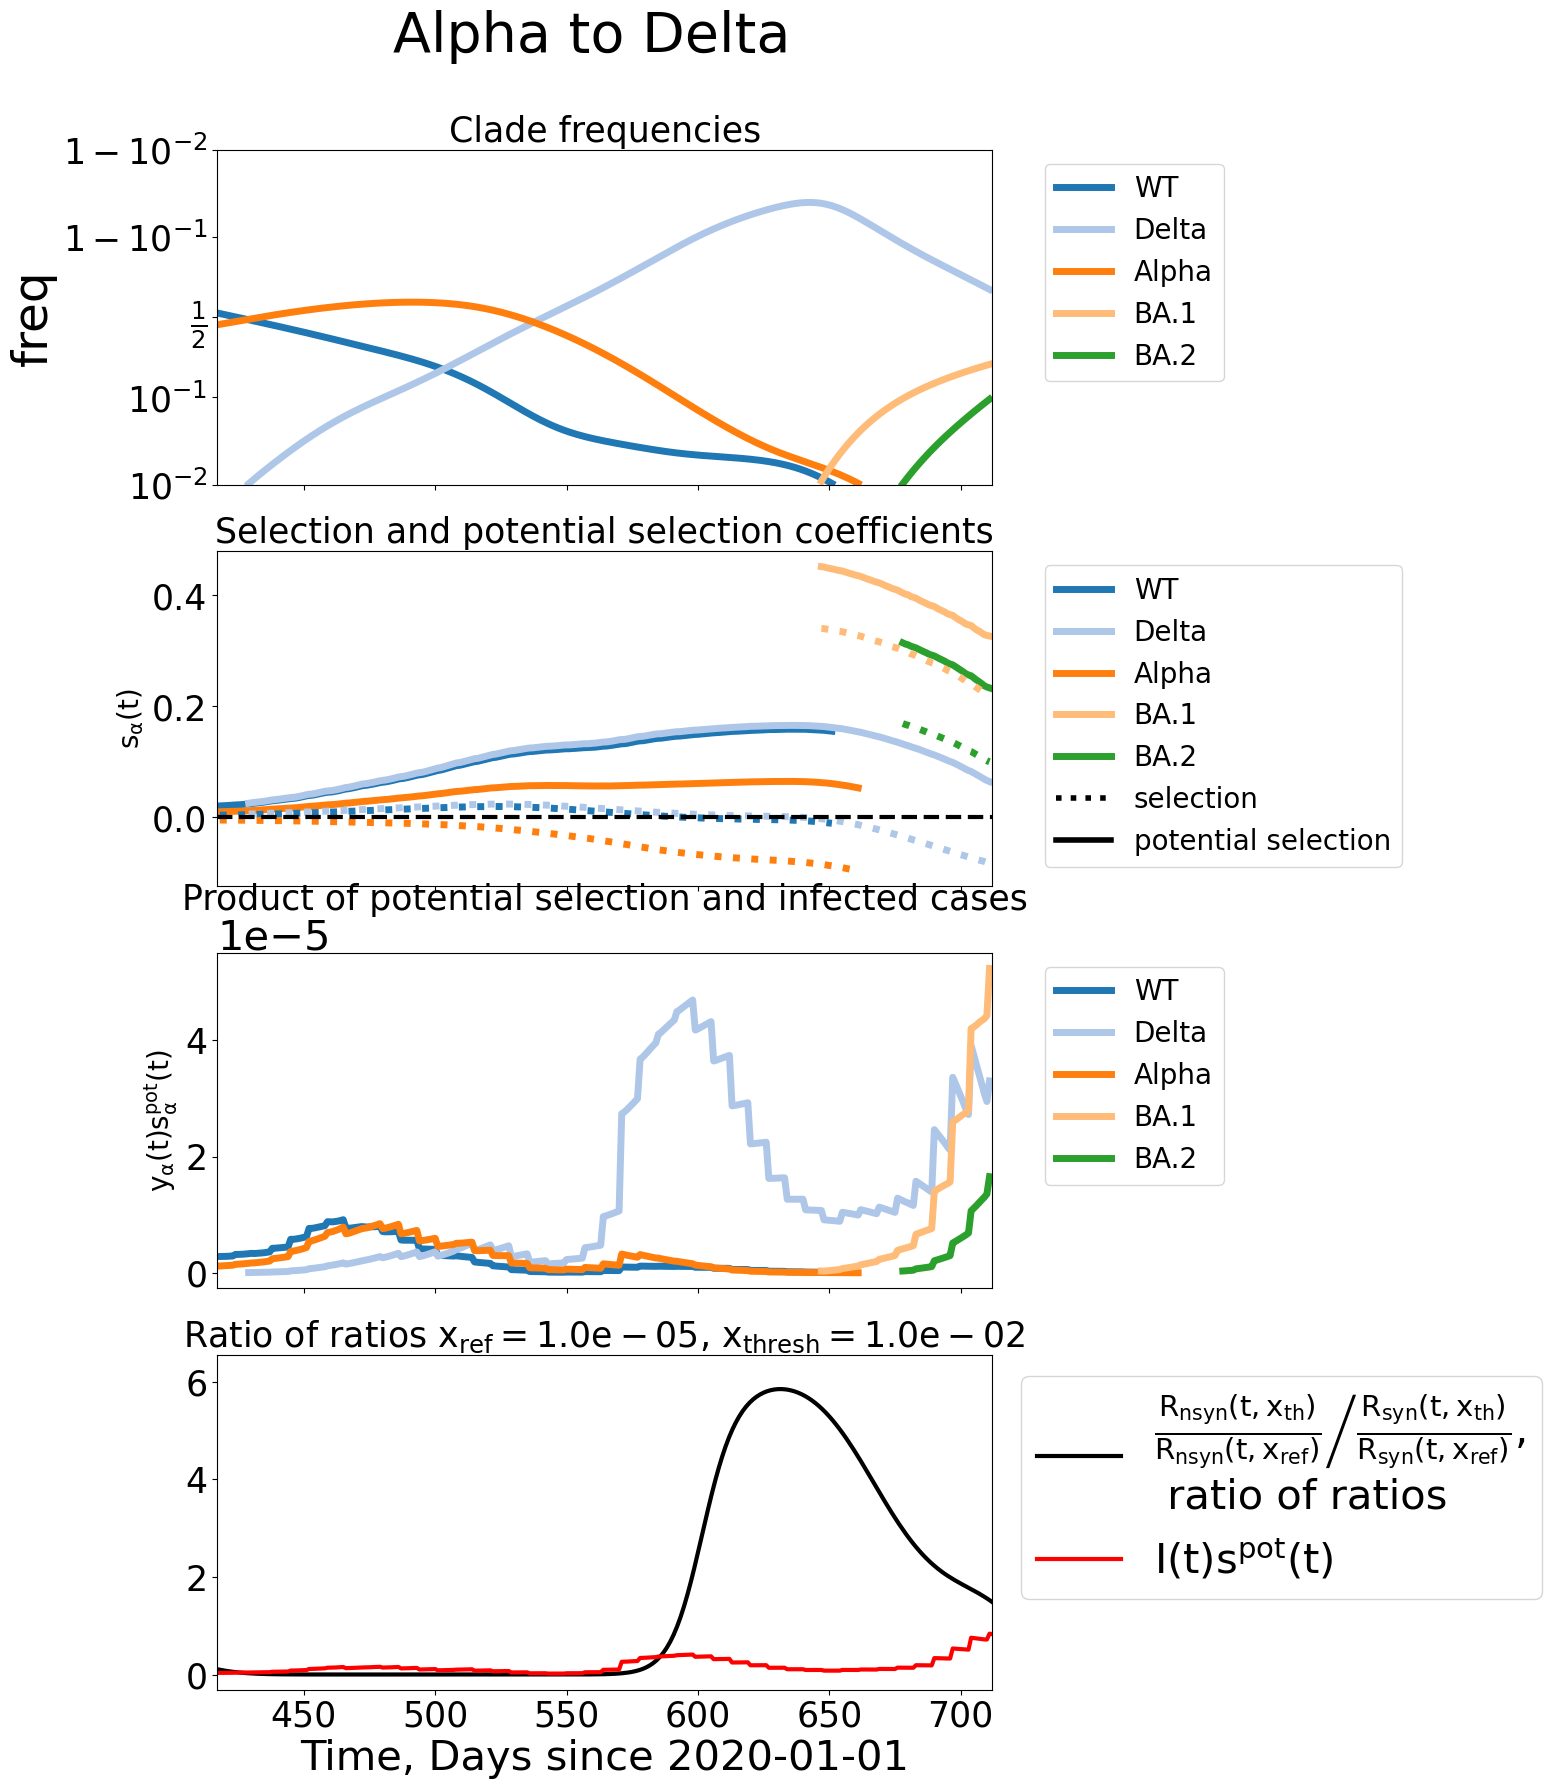

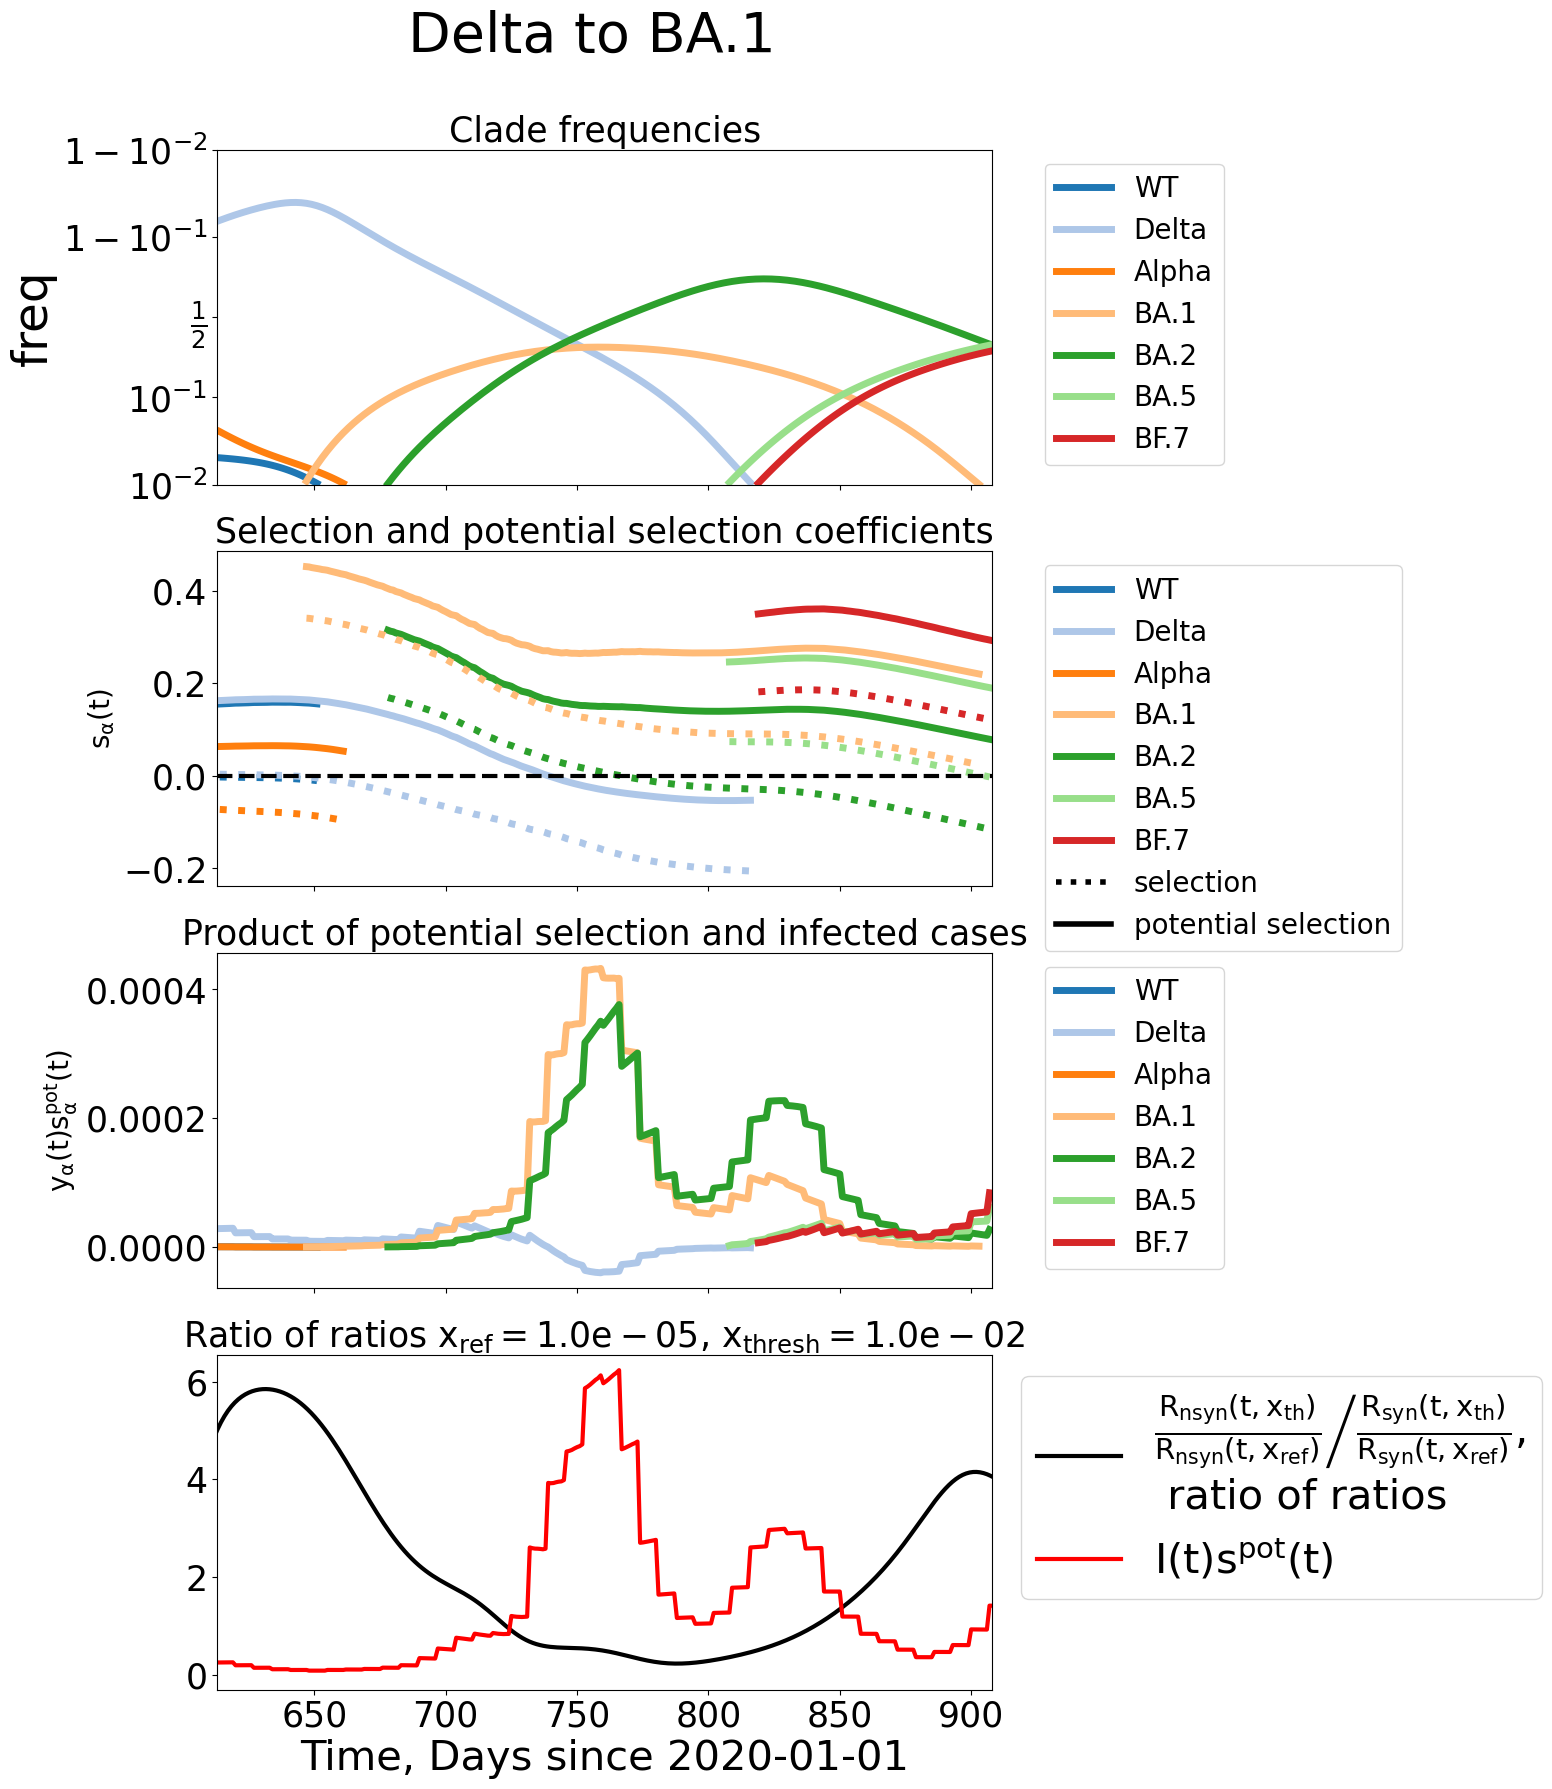

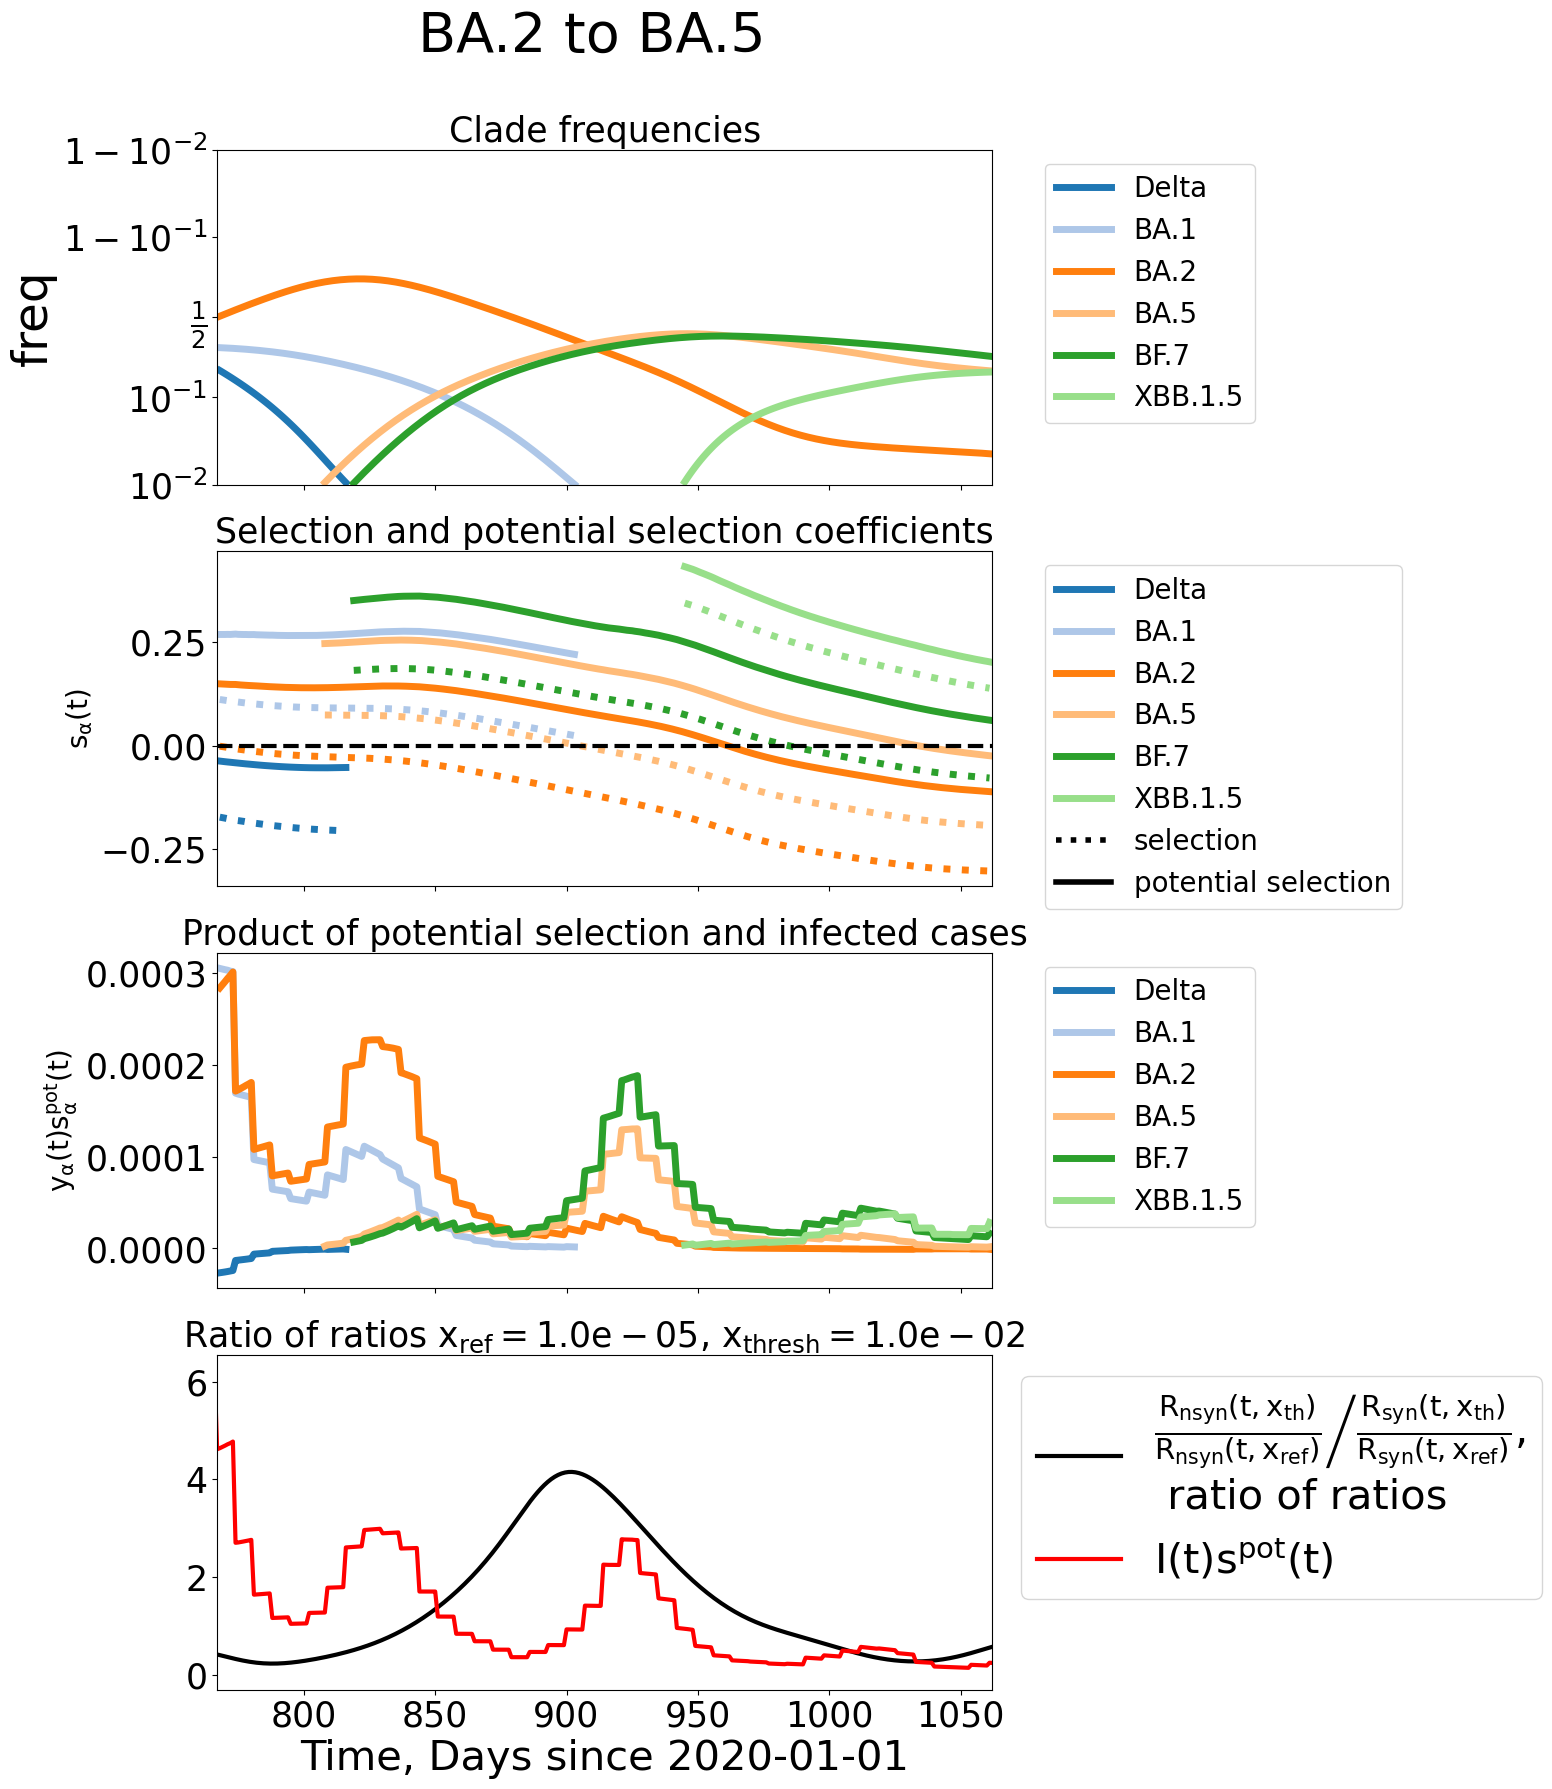

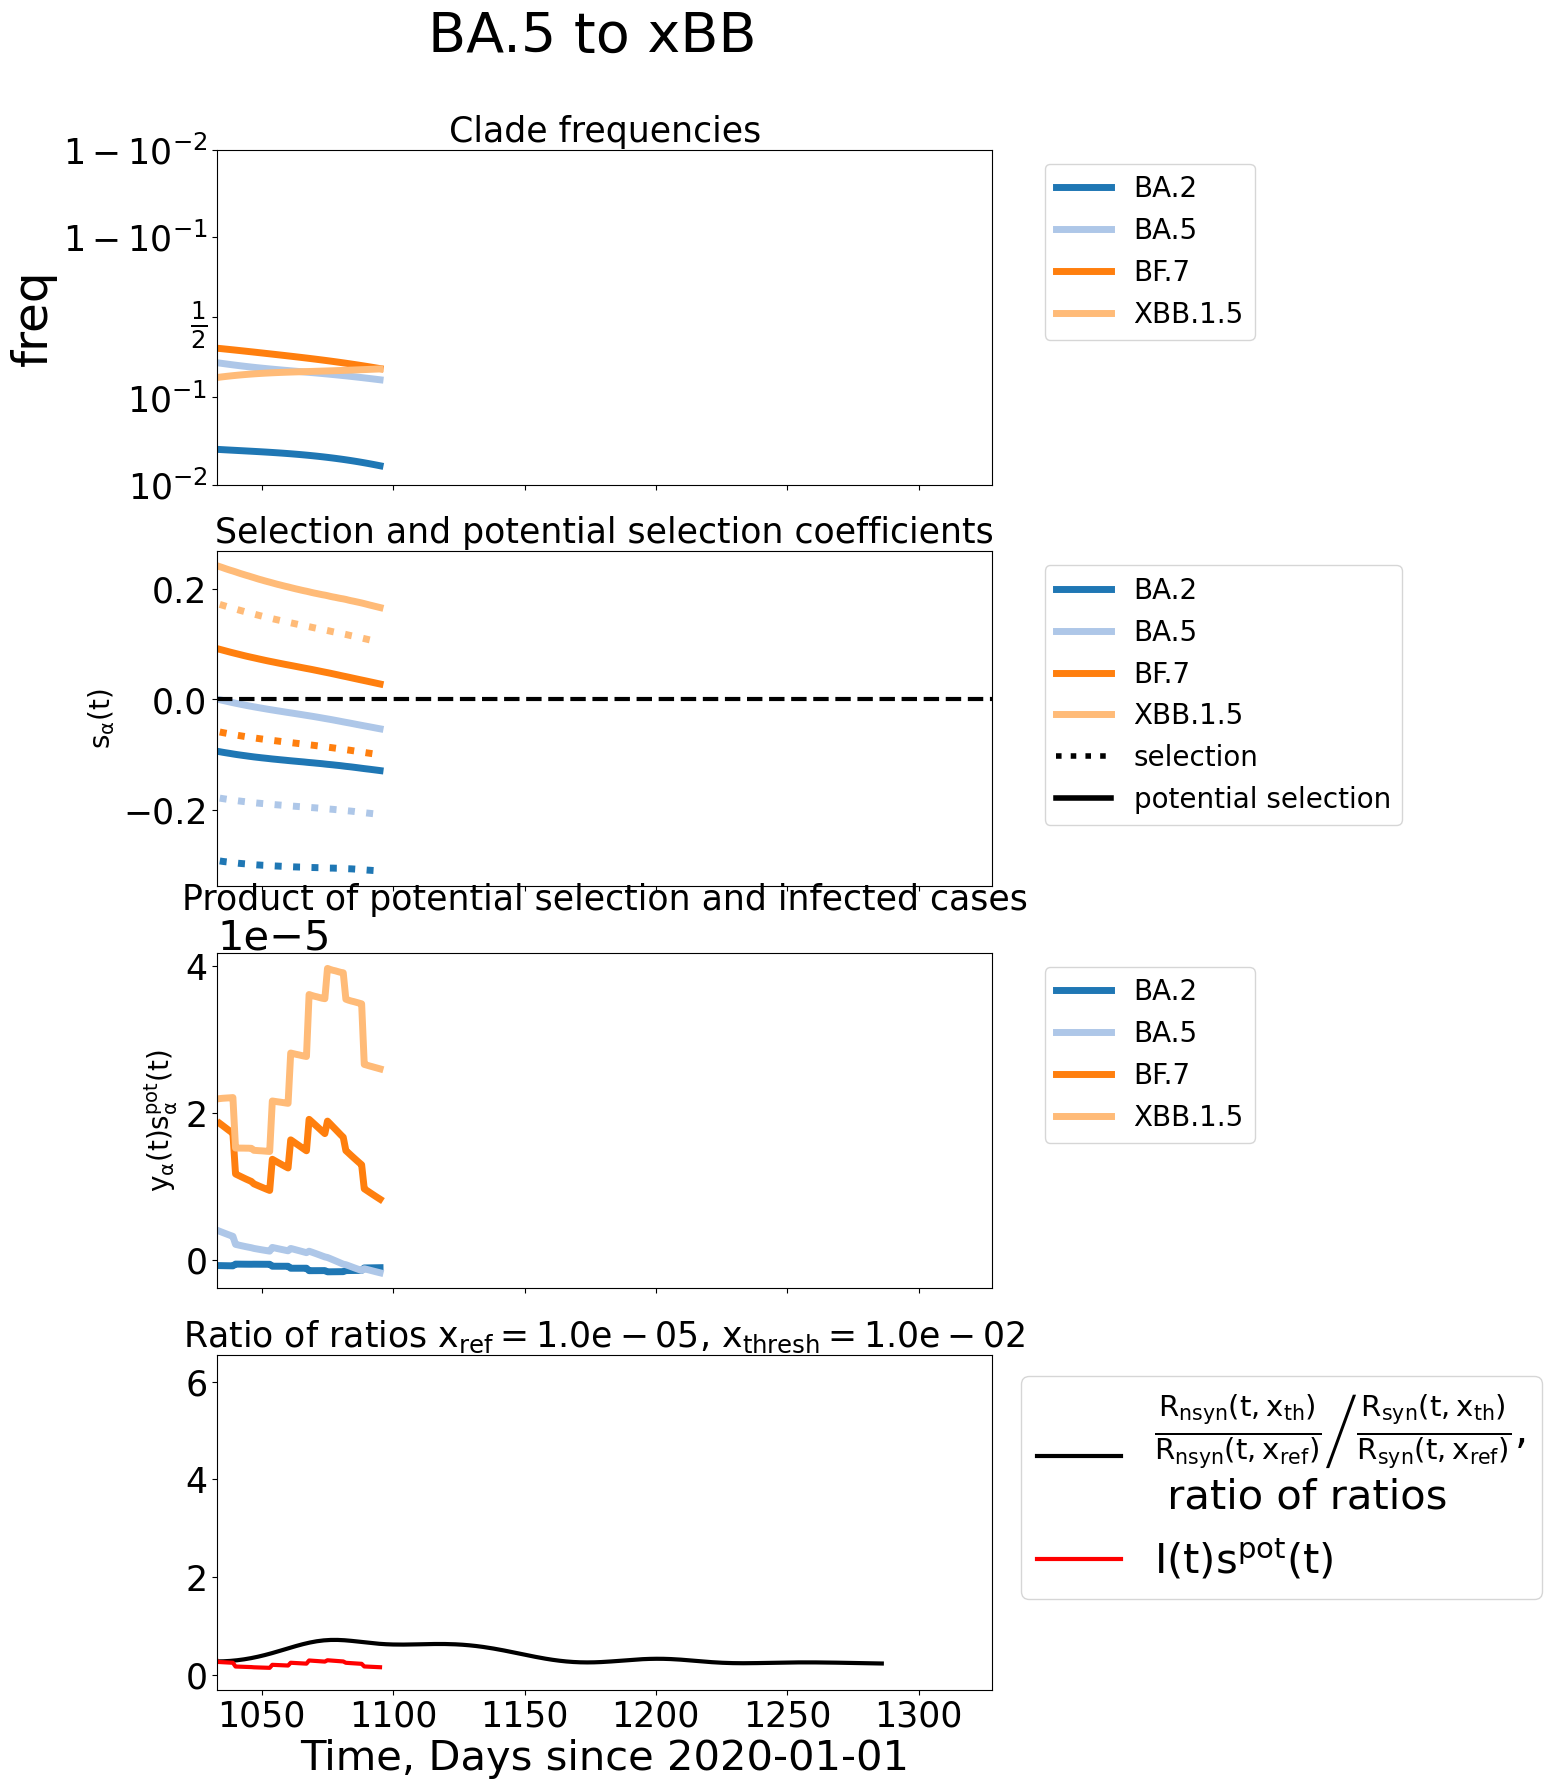

In [70]:
min_plotted_freq = 1e-2
window_size_left = 120
window_size_right = 175

x_thresh_ref = 1e-5
x_thresh = 1e-2

for crossover_date, crossover_label in zip(crossover_dates,crossover_labels):
    fig,ax = plt.subplots(4,1,figsize=(10,20),sharex=True)

    xlim_center = (crossover_date - reference_date).days

    sns.lineplot(df_reworked.query(f'{xlim_center - window_size_left} < day_diff < {xlim_center + window_size_right} & freq> {min_plotted_freq}'), x= 'day_diff', y= 'freq', hue = 'clade', ax=ax[0], lw=5,palette='tab20',)

    sns.lineplot(df_reworked.query(f'{xlim_center - window_size_left} < day_diff < {xlim_center + window_size_right} & freq> {min_plotted_freq}'), x= 'day_diff', y= 'f_pot', hue = 'clade', ax=ax[1], lw=5,palette='tab20',)

    sns.lineplot(df_reworked.query(f'{xlim_center - window_size_left} < day_diff < {xlim_center + window_size_right} & freq> {min_plotted_freq}'), x= 'day_diff', y= 'fit', hue = 'clade', ax=ax[1], lw=5,palette='tab20',ls=':',legend=False)

    sns.lineplot(df_reworked.query(f'{xlim_center - window_size_left} < day_diff < {xlim_center + window_size_right} & freq> {min_plotted_freq}'), x= 'day_diff', y= 'pot_s_times_y_t', hue = 'clade', ax=ax[2], lw=5,palette='tab20',)


    # ax[0].set_xlim(left=xlim_center - window_size,right=xlim_center + window_size)
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
    

    ax[0].set_yscale('logit')
    if ax[0].get_yscale() == 'logit':
        #set ytick
        ax[0].set_yticks([1e-2,1e-1,1/2,1-1e-1,1-1e-2])
        #reduce size of minor ticks
        ax[0].minorticks_off()
    

    ax[0].set_ylim(min_plotted_freq,1-min_plotted_freq)

    ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
    ax[1].set_ylabel(r'$s_\alpha(t)$',fontsize=20)
    ax1_handles = ax[1].get_legend().legendHandles
    ax1_handles += [Line2D([0], [0], color='black', lw=4, label='selection',ls=':'),
                     Line2D([0], [0], color='black', lw=4, label='potential selection',ls='-')]
    
    ax[1].legend(handles=ax1_handles, loc='upper left', fontsize=20, bbox_to_anchor=(1.05, 1))
    ax[1].axhline(0,color='black',ls='--')

    ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
    ax[2].set_ylabel(r'$y_\alpha(t)s^\mathrm{pot}_\alpha(t)$',fontsize=20)

    plot_twin_ax = False

    href_syn, bref_syn = np.histogram(syn_clade_stats[f'day_diff_x_bgr_{x_thresh_ref}'].dropna(),bins = hist_ts, density= False)
    hx_syn, bx_syn = np.histogram(syn_clade_stats[f'day_diff_x_bgr_{x_thresh}'].dropna(),bins = hist_ts, density= False)

    href_nonsyn_RBD, bref_nonsyn_RBD = np.histogram(nonsyn_RBD_clade_stats[f'day_diff_x_bgr_{x_thresh_ref}'].dropna(),bins = hist_ts, density= False)
    
    hx_nonsyn_RBD, bx_nonsyn_RBD = np.histogram(nonsyn_RBD_clade_stats[f'day_diff_x_bgr_{x_thresh}'].dropna(),bins = hist_ts, density= False)

    ratio_nonsyn_RBD = hx_nonsyn_RBD/href_nonsyn_RBD
    ratio_syn = hx_syn/href_syn

    day_diff_with_syn_smooth, smoothed_href_syn = ut.get_kde( syn_clade_stats.query(f'Max_Freq > {x_thresh_ref}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)
    day_diff_with_nonsyn_RBD_smooth, smoothed_href_nonsyn_RBD = ut.get_kde( nonsyn_RBD_clade_stats.query(f'Max_Freq > {x_thresh_ref}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)

    day_diff_with_syn_smooth, smoothed_hx_syn = ut.get_kde( syn_clade_stats.query(f'Max_Freq > {x_thresh}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)
    day_diff_with_nonsyn_RBD_smooth, smoothed_hx_nonsyn_RBD = ut.get_kde( nonsyn_RBD_clade_stats.query(f'Max_Freq > {x_thresh}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)

    smoothed_ratio_nonsyn_RBD = smoothed_hx_nonsyn_RBD/smoothed_href_nonsyn_RBD
    smoothed_ratio_syn = smoothed_hx_syn/smoothed_href_syn

    ratio_of_ratios = smoothed_ratio_nonsyn_RBD/smoothed_ratio_syn

    y_times_s_summed = df_reworked.groupby(['day_diff']).apply(lambda x: np.sum(x['cases']*x['freq']*x['f_pot'])).values

    
    ax[-1].plot(day_diff_with_syn_smooth, ratio_of_ratios,color= 'black', label = r'$\left.\frac{R_{nsyn}(t,x_\mathrm{th})}{R_{nsyn}(t,x_\mathrm{ref})}\middle/\frac{R_{syn}(t,x_\mathrm{th})}{R_{syn}(t,x_\mathrm{ref})}\right.$,' + '\n ratio of ratios' )

    ax[-1].plot(np.sort(df_reworked.day_diff.unique()), y_times_s_summed/np.max(y_times_s_summed)* ratio_of_ratios.max(),color='red',label=r'$I(t)s^\mathrm{pot}(t)$')

    ax_ratio_of_ratios.axhline(1,color='k',ls='--')

    ax[-1].set_xlim(left=xlim_center - window_size_left,right=xlim_center + window_size_right)

    ax[-1].legend(loc='upper left',fontsize=30, bbox_to_anchor=(1.01, 1))   
    ax[0].set_title('Clade frequencies',fontsize=25)
    ax[1].set_title('Selection and potential selection coefficients',fontsize=25)
    ax[2].set_title('Product of potential selection and infected cases',fontsize=25)
    ax[3].set_title('Ratio of ratios' + fr' $x_\mathrm{{ref}} = {x_thresh_ref:.1e}$, $x_\mathrm{{thresh}} =  {x_thresh:.1e}$',fontsize=25)
    for a in ax:
        a.tick_params(labelsize=25)
    fig.suptitle(crossover_label,fontsize=40,y=.95)
    ax[-1].set_xlabel('Time, Days since 2020-01-01',fontsize=30)

    

In [64]:
df_reworked.day_diff.max()

1095.0

In [42]:
df_reworked.query("clade == 'Alpha'")

clade  day_diff  freq   avg_fit   fit_vac   fit_inf  f_pot_inf  \
0     Alpha       0.0   0.0  0.000000  0.000000  0.000000        0.0   
1     Alpha       1.0   0.0  0.000000  0.000000  0.000000        0.0   
2     Alpha       2.0   0.0  0.000000  0.000000  0.000000        0.0   
3     Alpha       3.0   0.0  0.000000  0.000000  0.000000        0.0   
4     Alpha       4.0   0.0  0.000000  0.000000  0.000000        0.0   
...     ...       ...   ...       ...       ...       ...        ...   
1091  Alpha    1091.0   0.0 -0.036868 -0.426285 -0.119799        0.0   
1092  Alpha    1092.0   0.0 -0.036774 -0.426524 -0.119801        0.0   
1093  Alpha    1093.0   0.0 -0.036670 -0.426679 -0.119804        0.0   
1094  Alpha    1094.0   0.0 -0.036567 -0.426962 -0.119810        0.0   
1095  Alpha    1095.0   0.0 -0.036465 -0.427371 -0.119815        0.0   

      f_pot_vac     cases       fit  f_pot  selection  pot_selection  y_t  \
0           0.0  0.000000  0.000000    0.0        0.0            0.0  0.0   
1           0.0  0.000000  0.000000    0.0        0.0            0.0  0.0   
2           0.0  0.000000  0.000000    0.0        0.0            0.0  0.0   
3           0.0  0.000000  0.000000    0.0        0.0            0.0  0.0   
4           0.0  0.000000  0.000000    0.0        0.0            0.0  0.0   
...         ...       ...       ...    ...        ...            ...  ...   
1091        0.0  0.000663 -0.546084    0.0       -0.0            0.0  0.0   
1092        0.0  0.000663 -0.546325    0.0       -0.0            0.0  0.0   
1093        0.0  0.000663 -0.546484    0.0       -0.0            0.0  0.0   
1094        0.0  0.000663 -0.546772    0.0       -0.0            0.0  0.0   
1095        0.0  0.000663 -0.547186    0.0       -0.0            0.0  0.0   

      s_times_y_t  pot_s_times_y_t  is_majority_clade  
0             0.0              0.0              False  
1             0.0              0.0              False  
2             0.0              0.0              False  
3             0.0              0.0              False  
4             0.0              0.0              False  
...           ...              ...                ...  
1091         -0.0              0.0              False  
1092         -0.0              0.0              False  
1093         -0.0              0.0              False  
1094         -0.0              0.0              False  
1095         -0.0              0.0              False  

[1096 rows x 17 columns]

In [43]:
x_thresh_ref = 1e-5
x_thresh = 1e-3

In [44]:
x_thresh_vals

array([0.e+00, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])

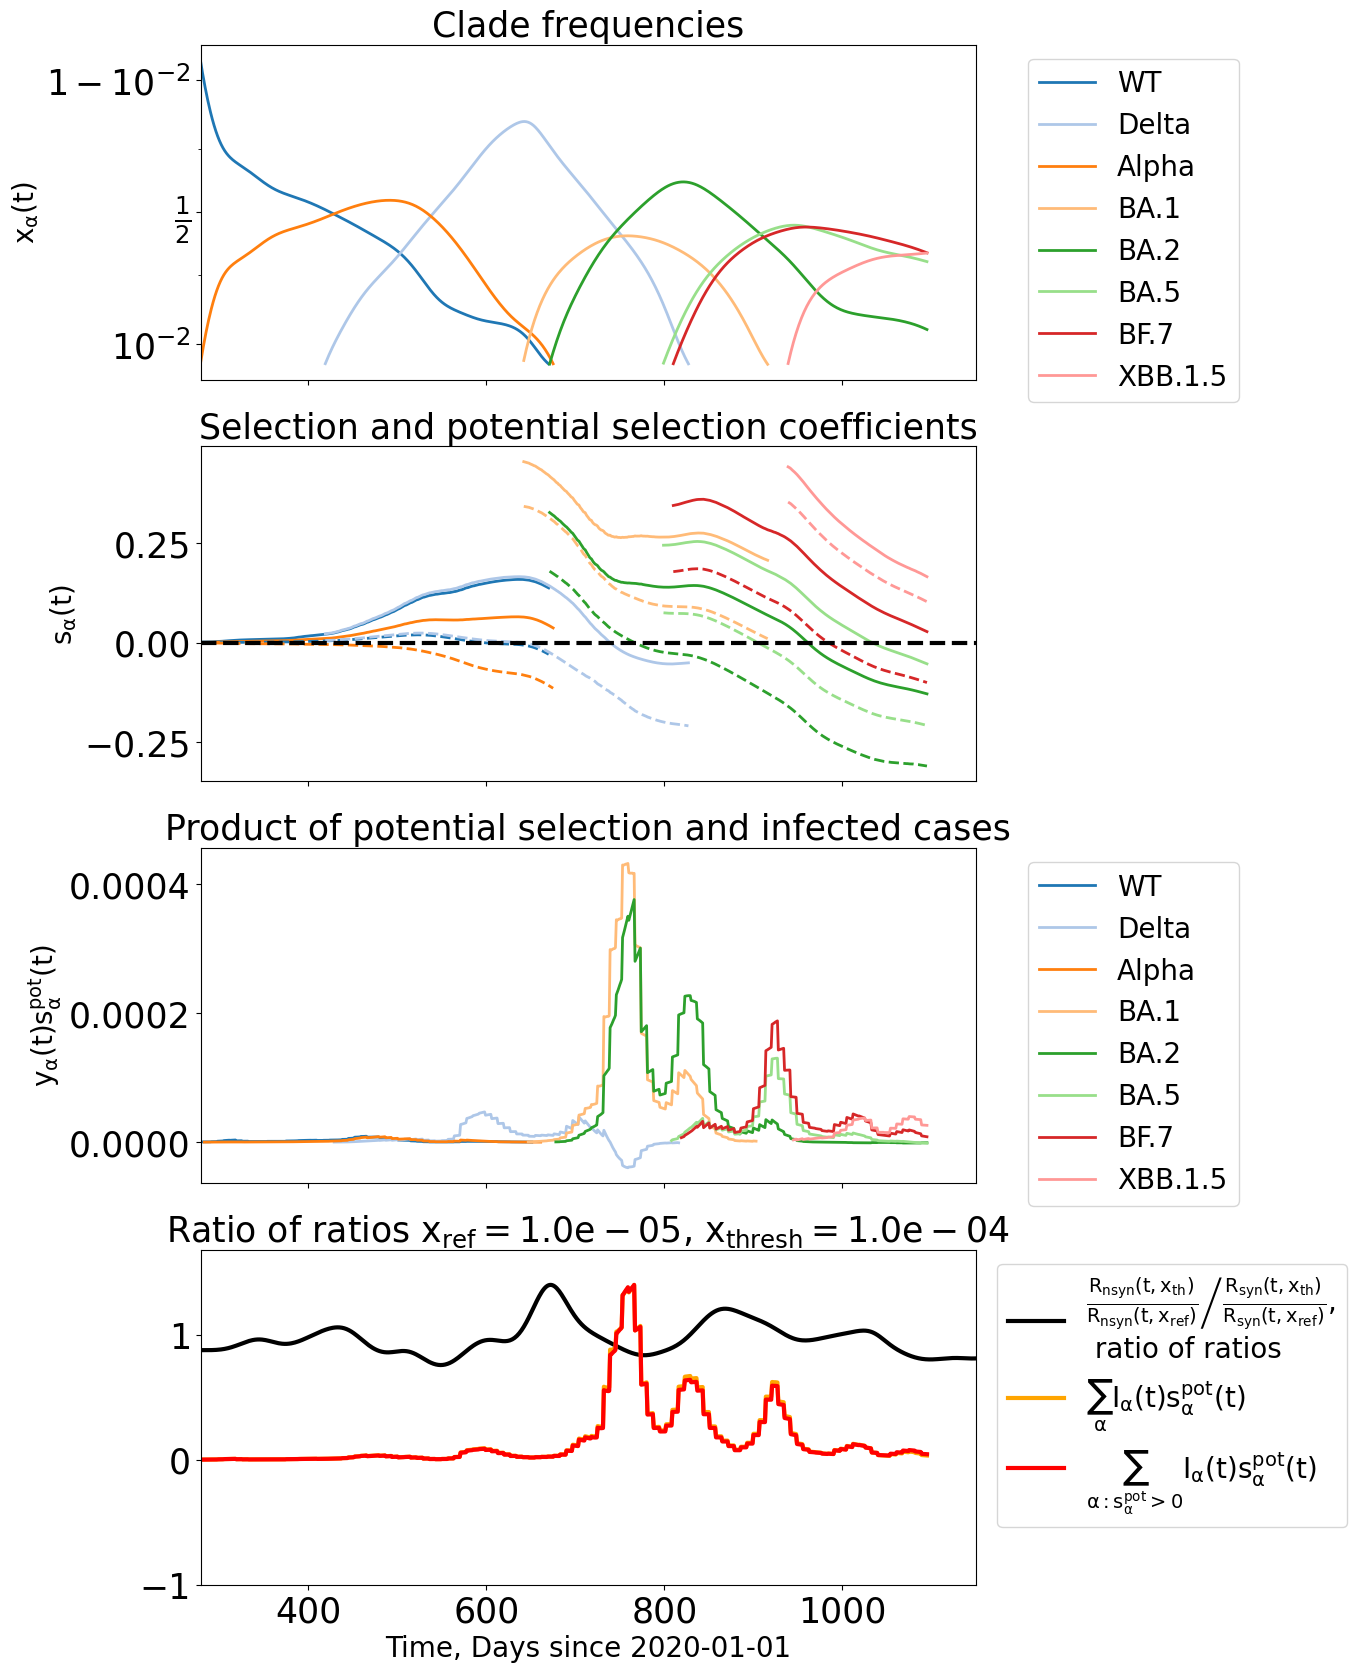

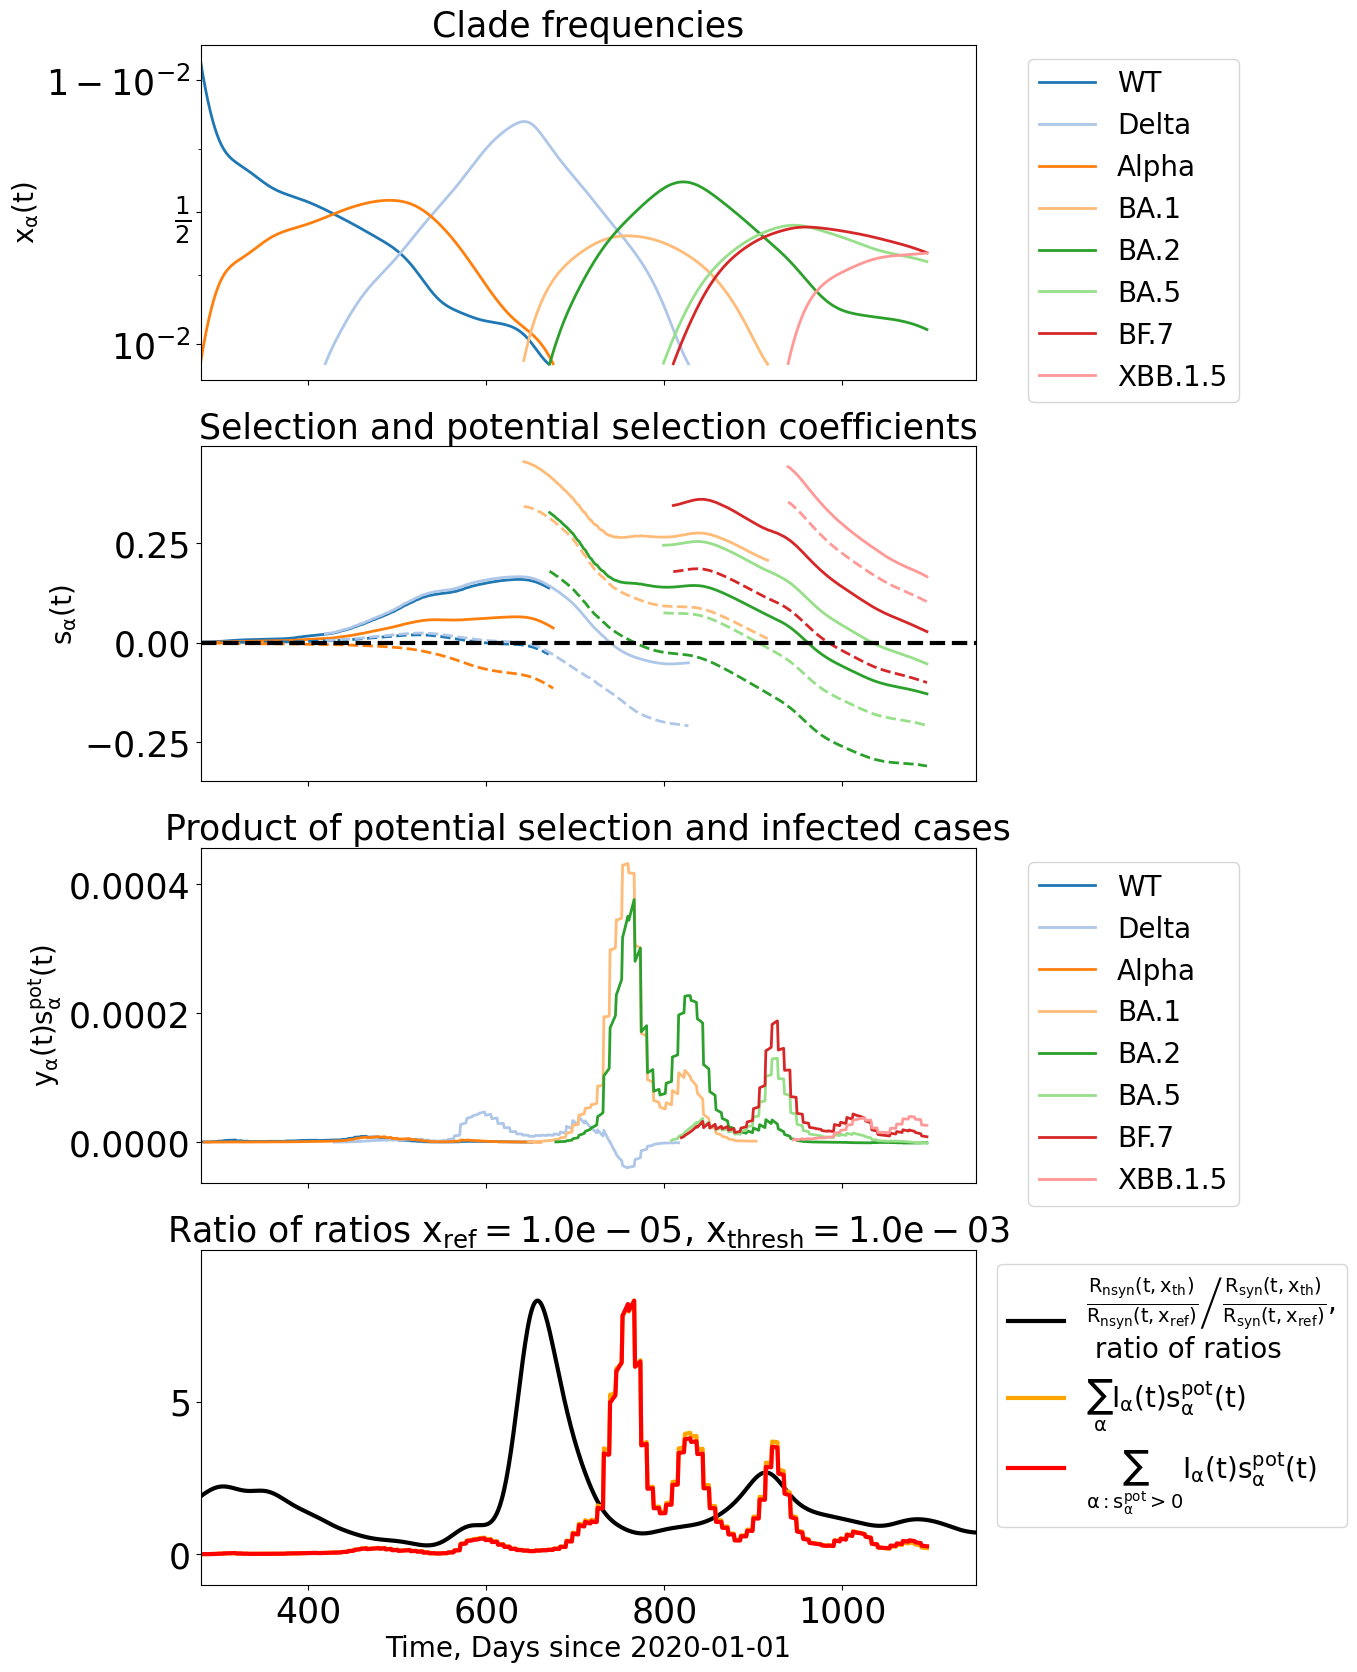

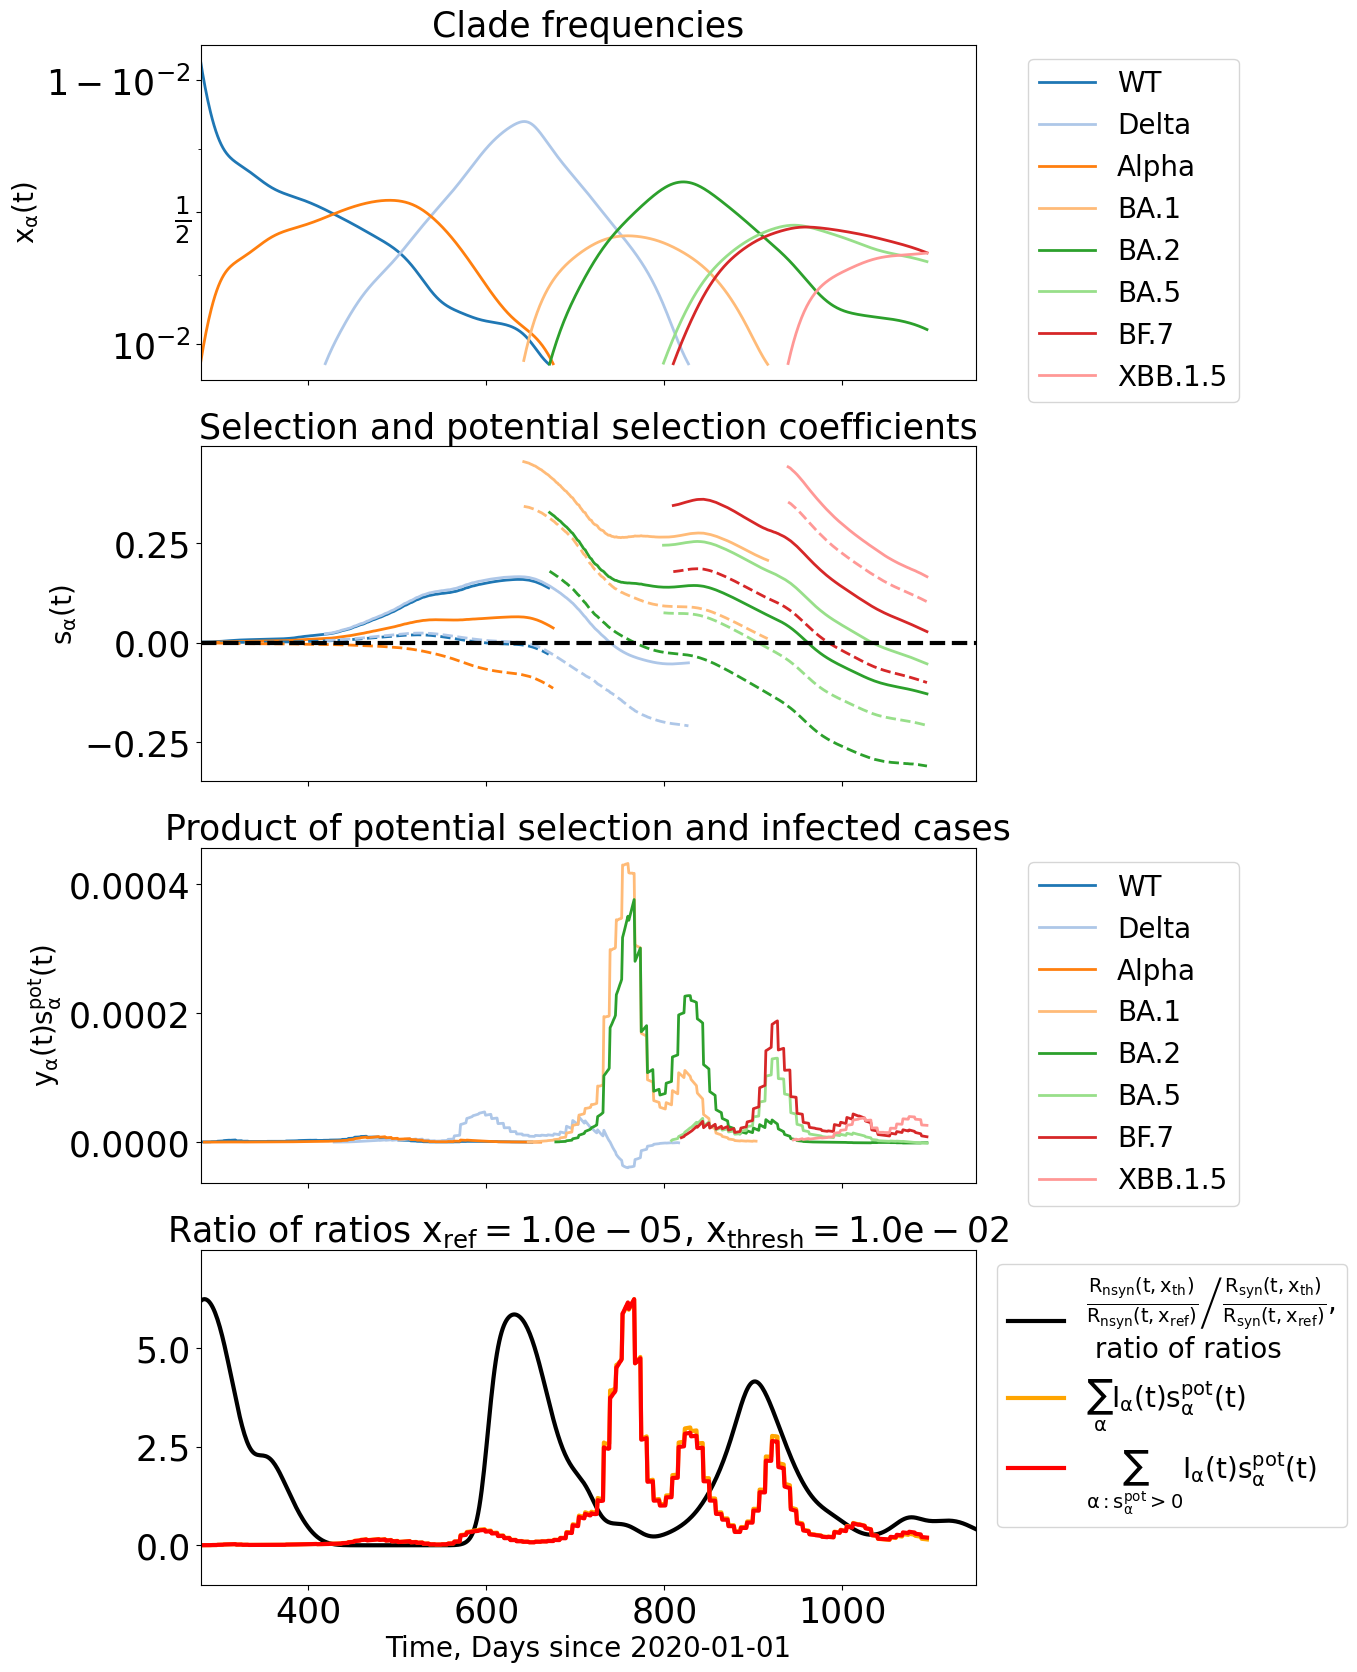

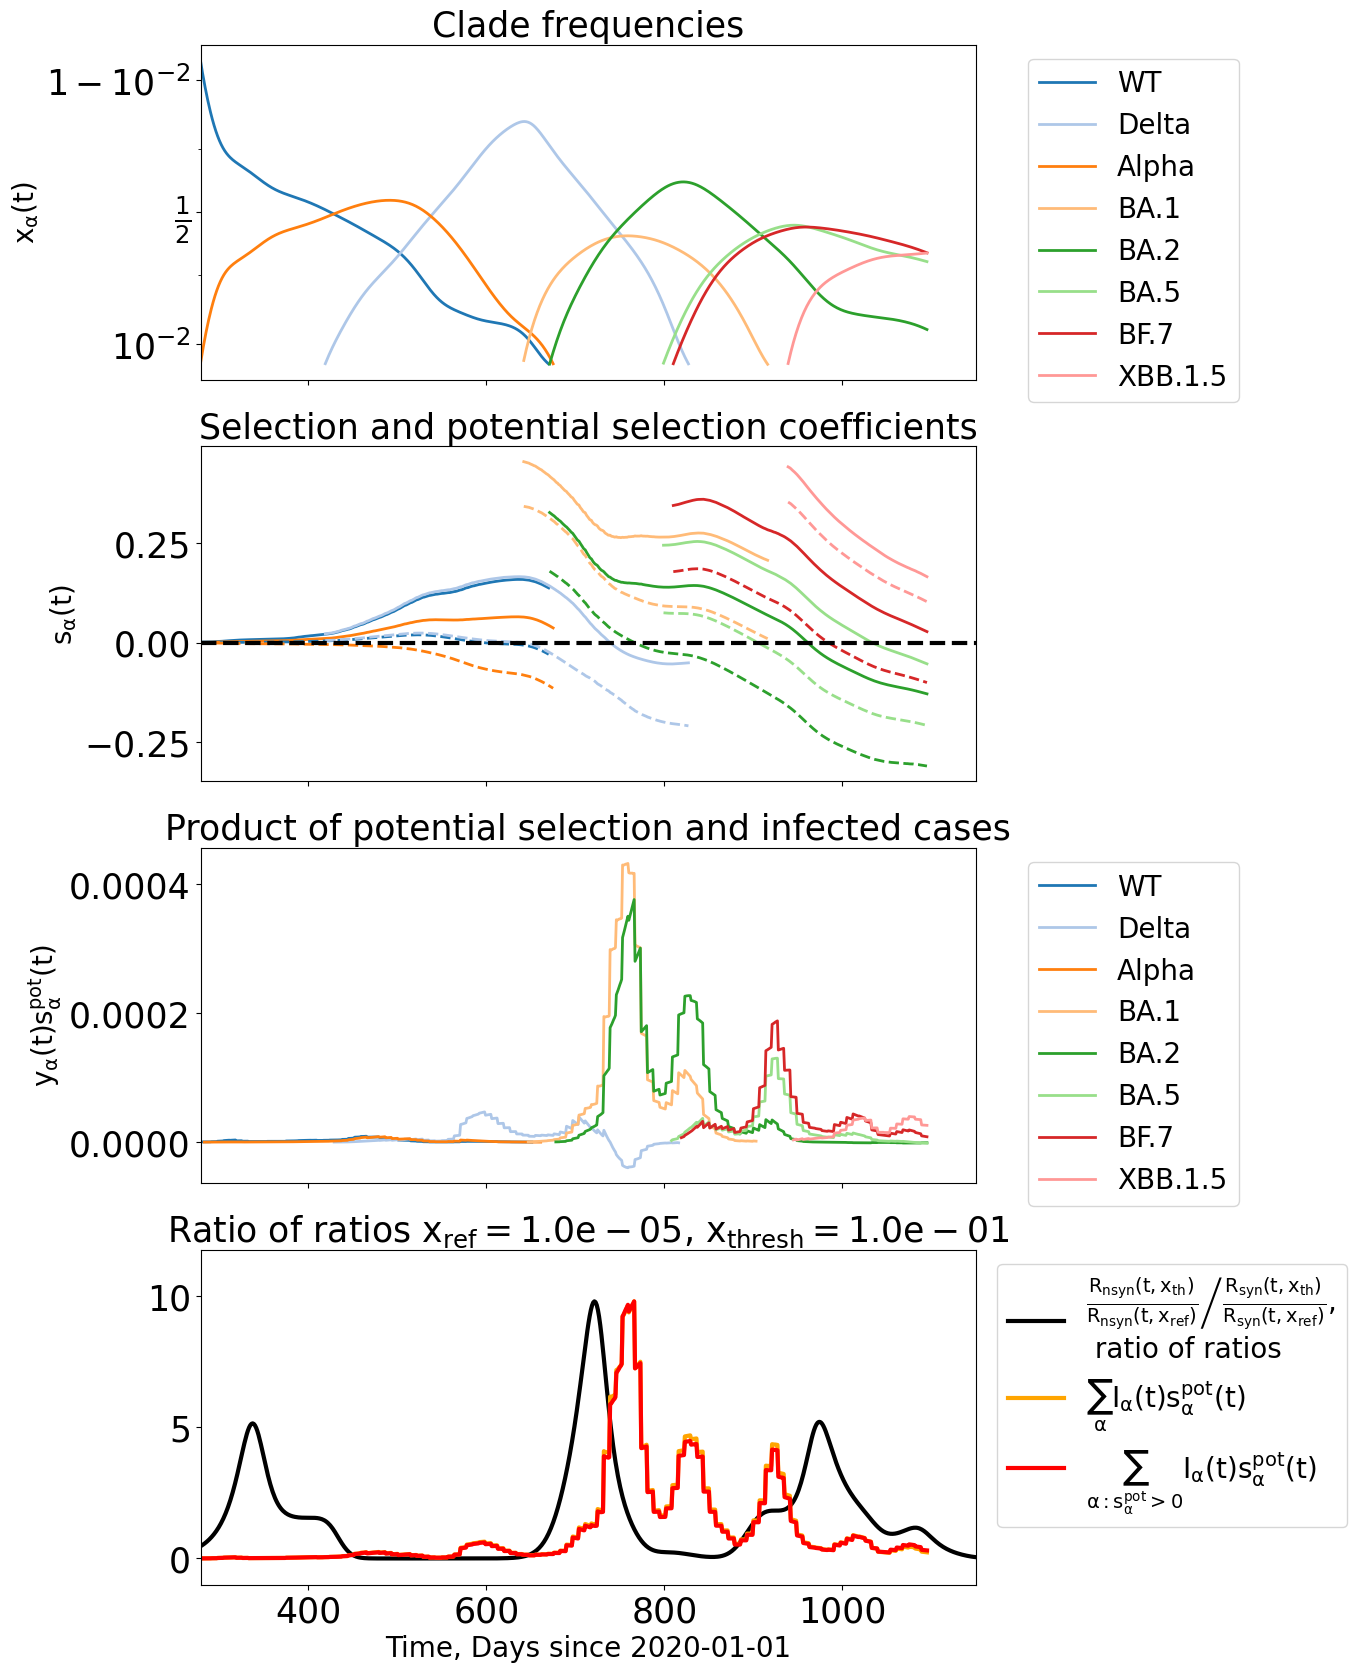

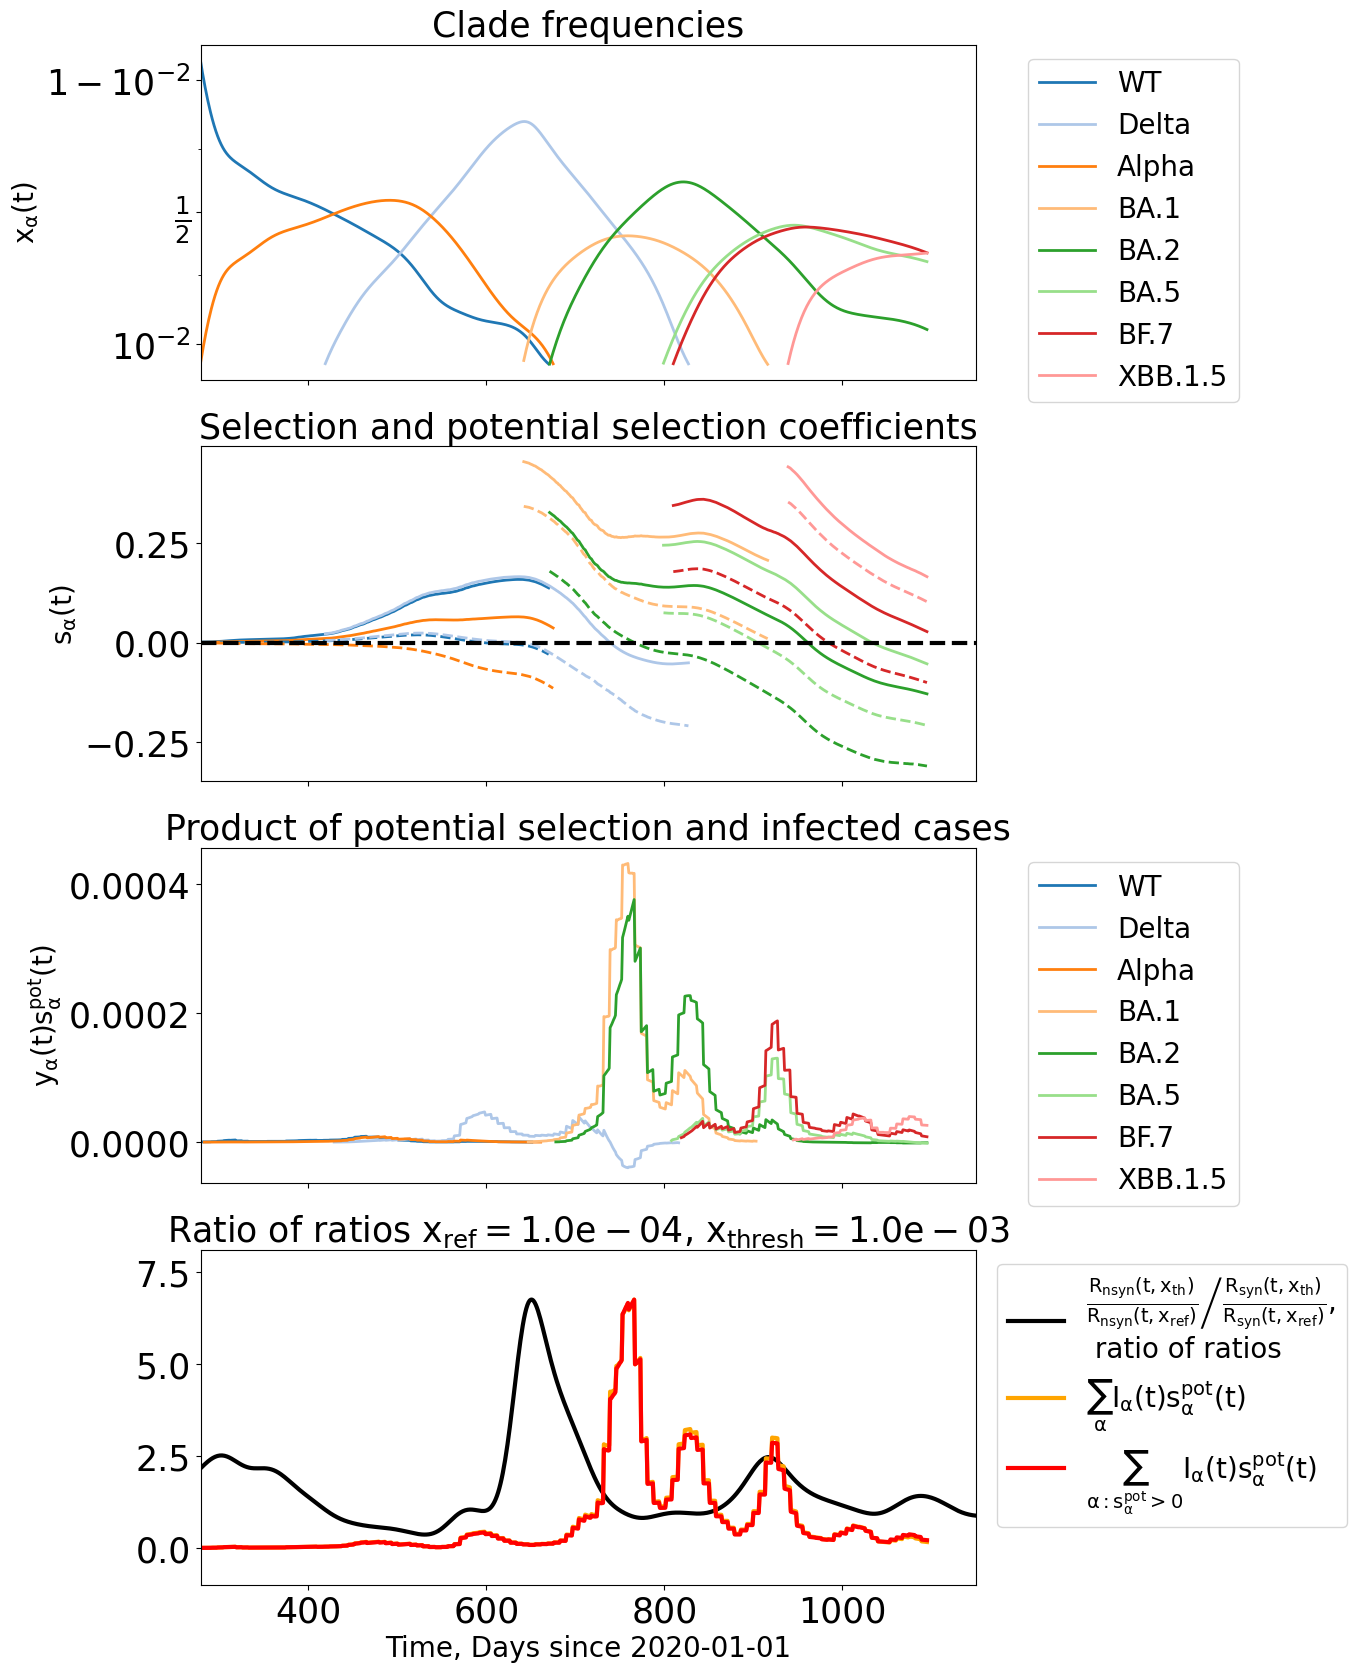

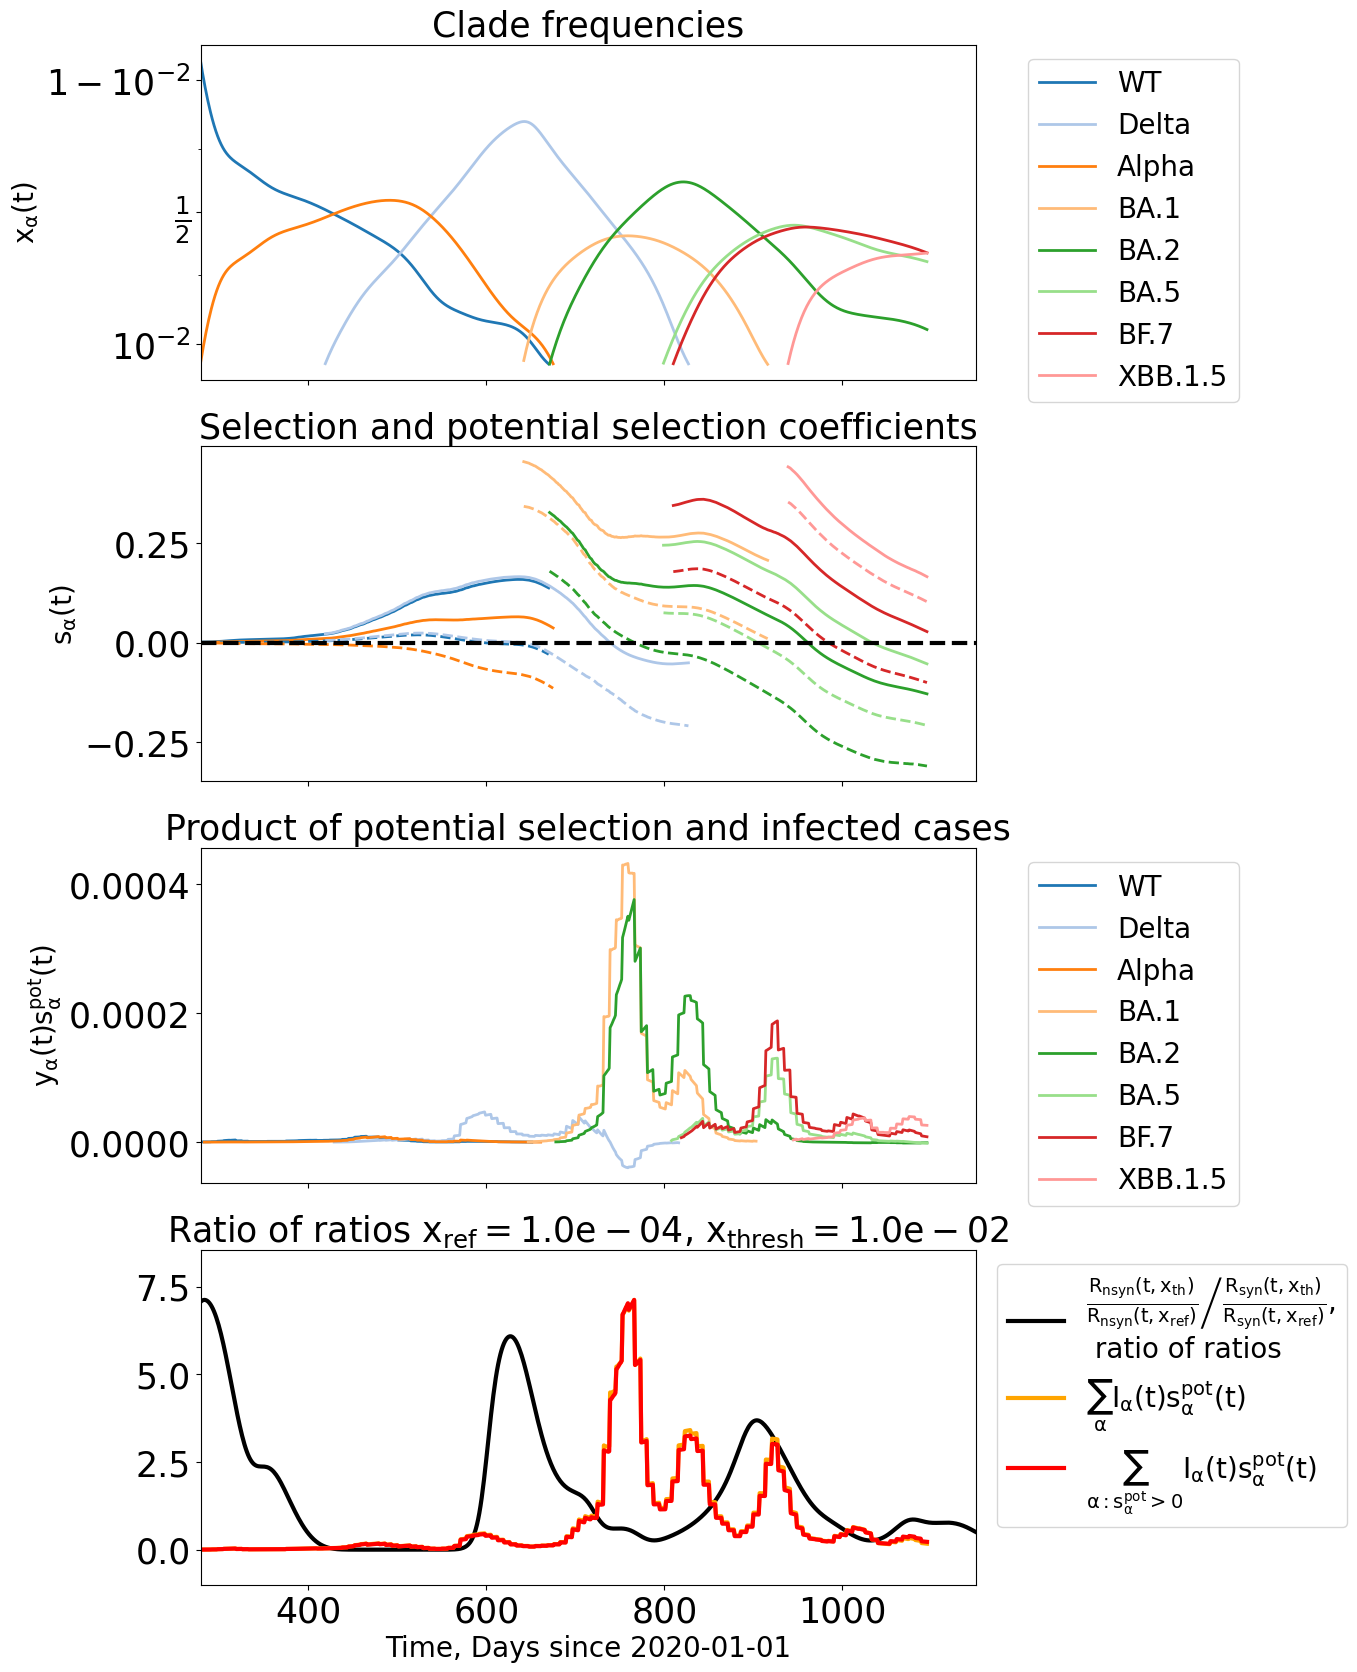

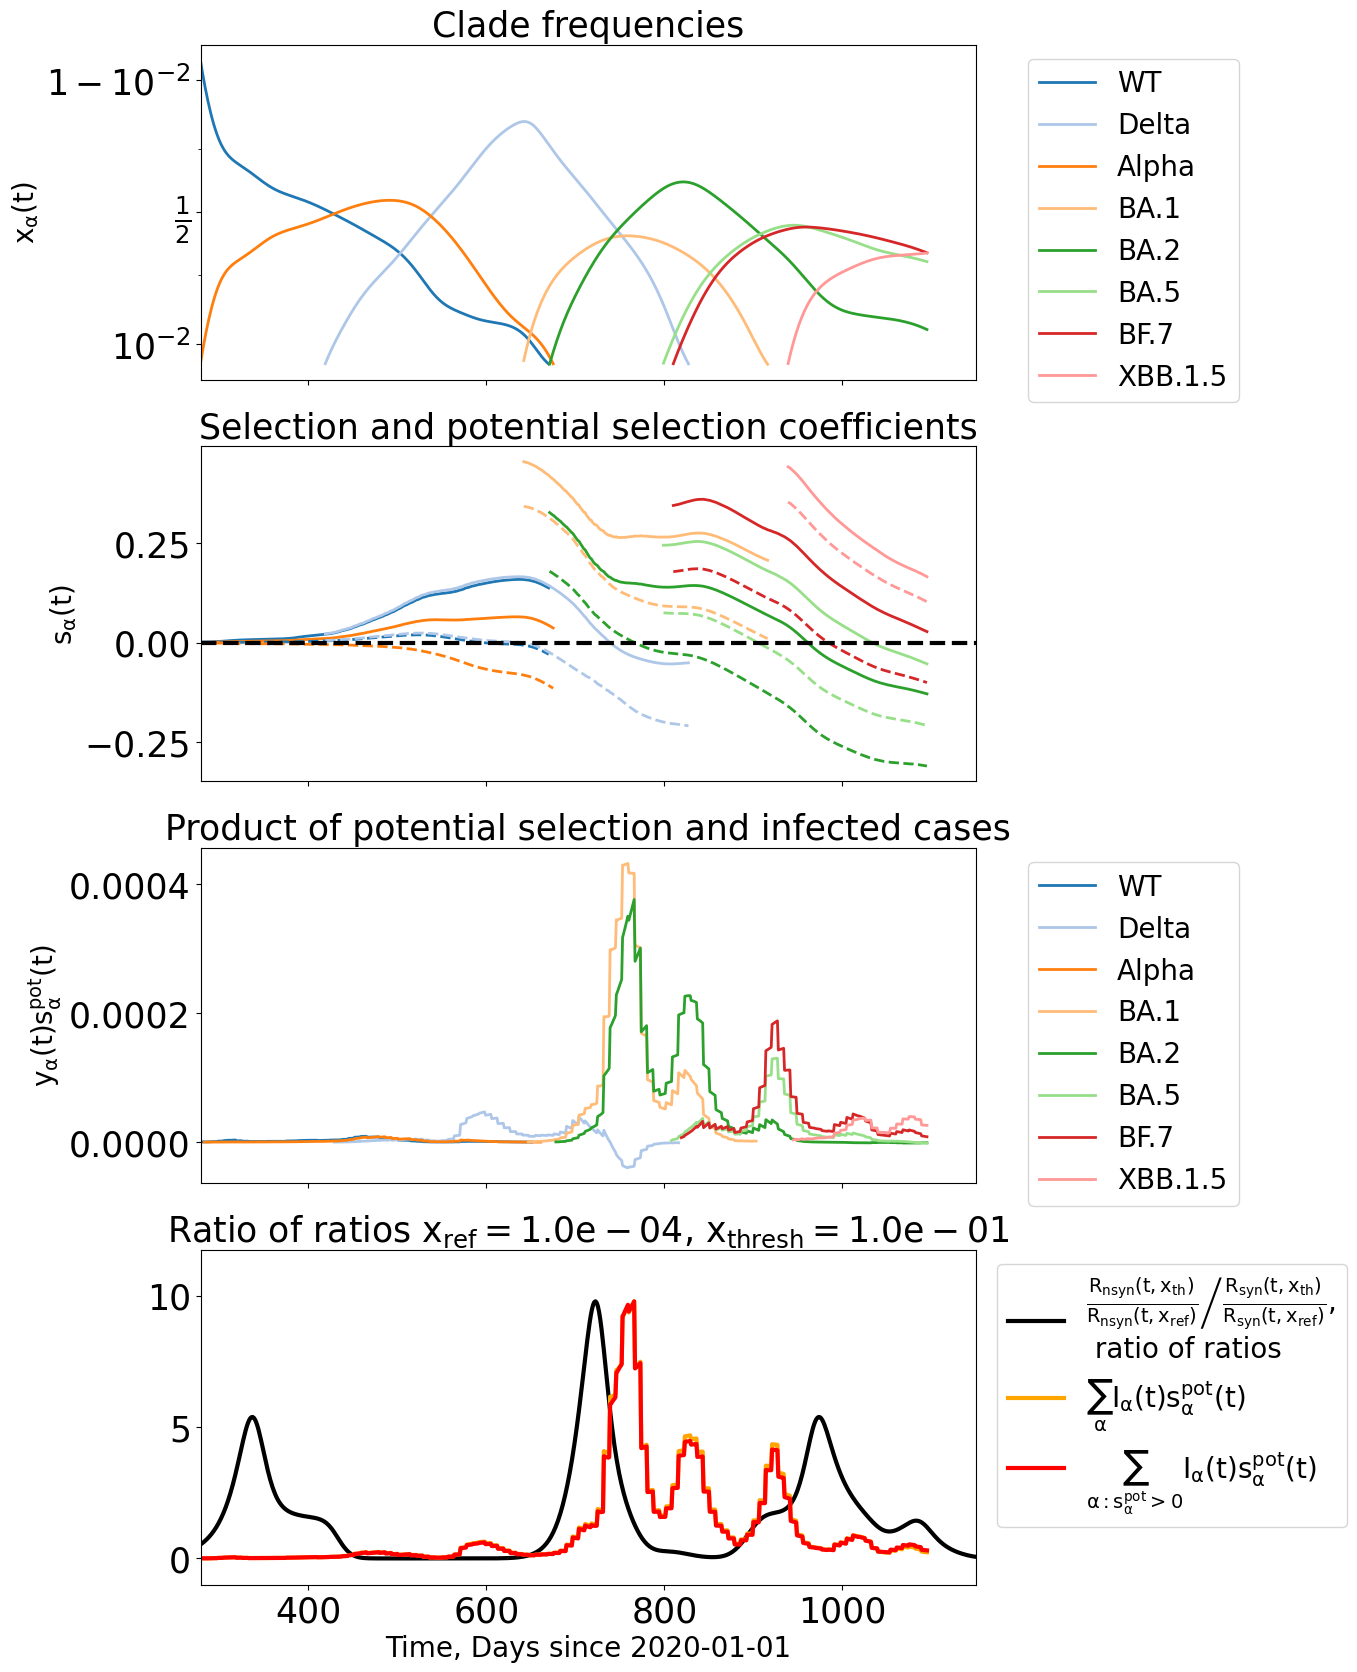

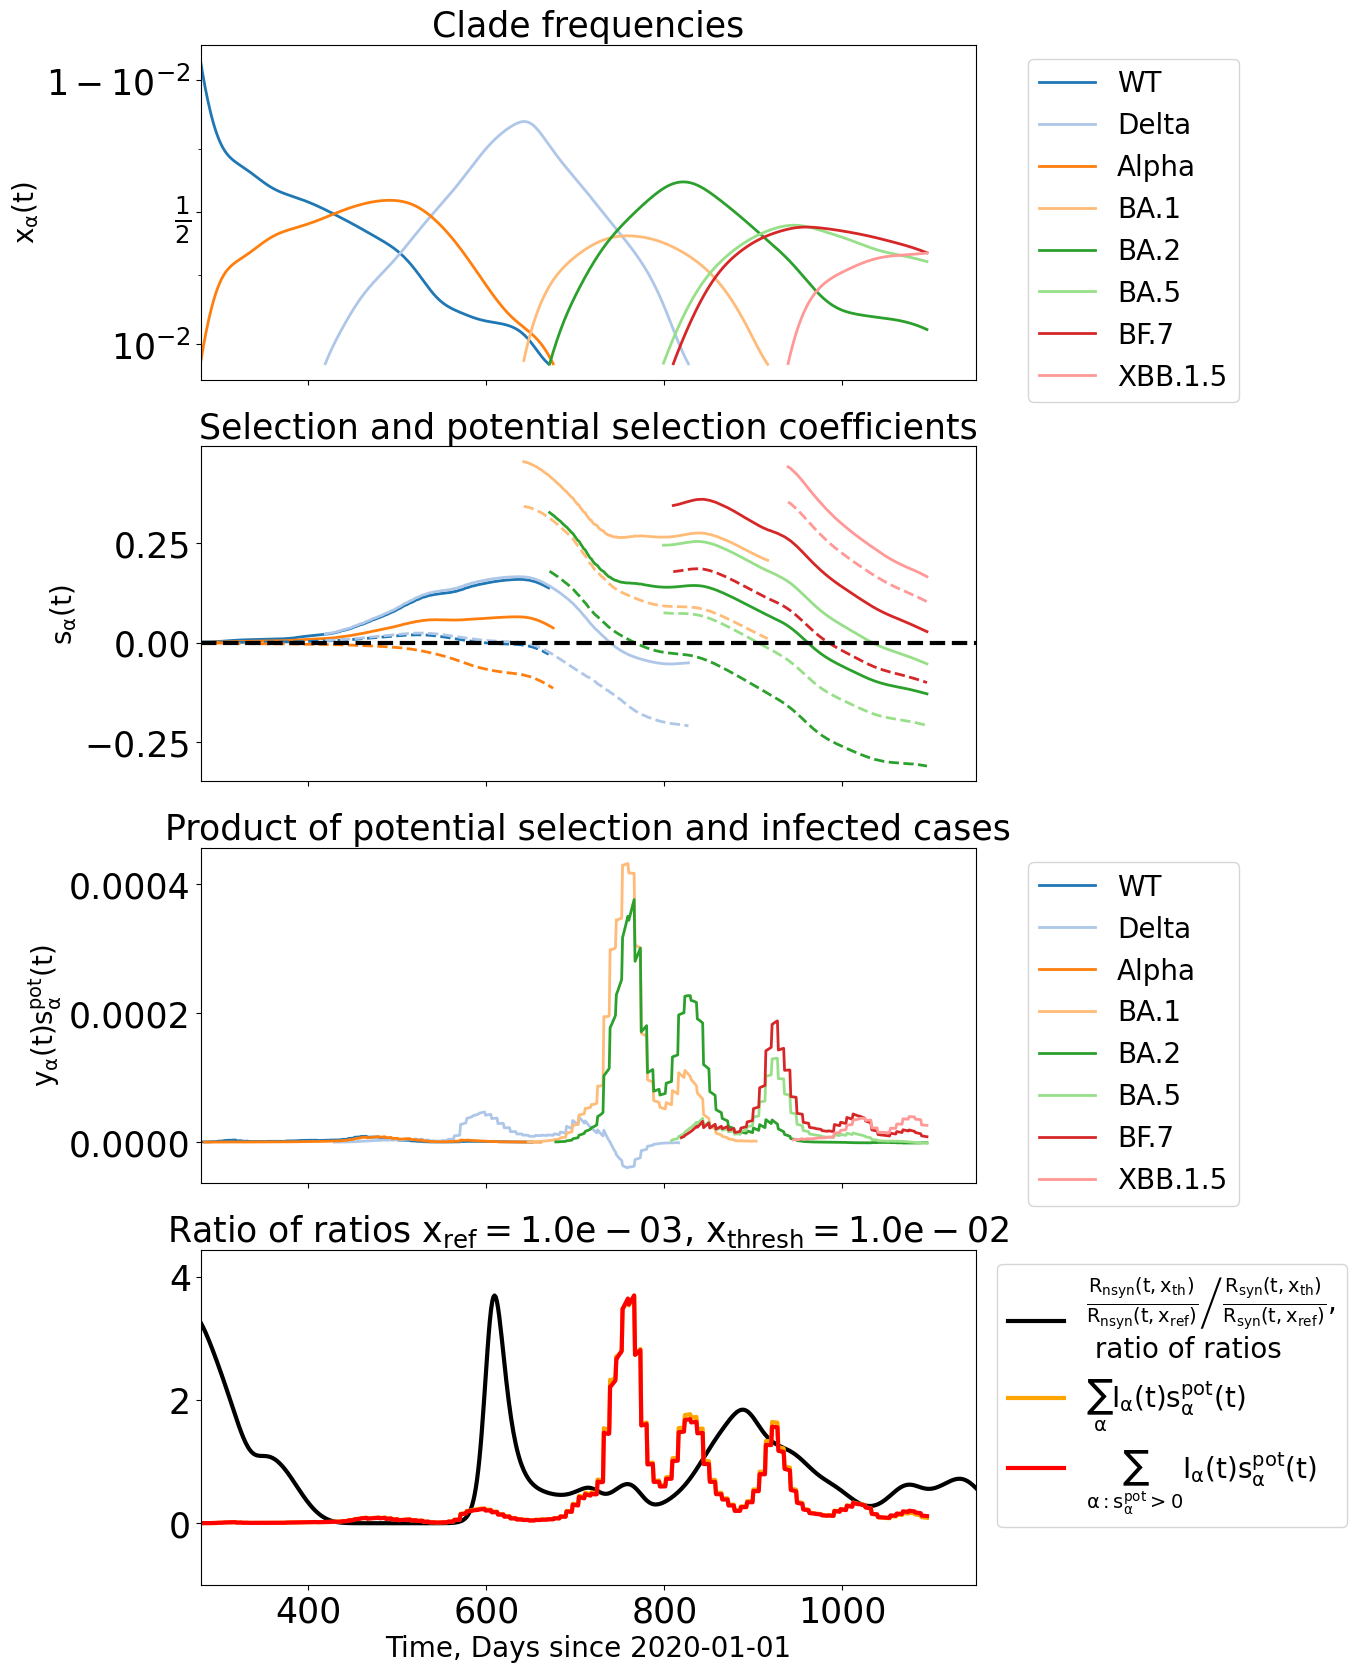

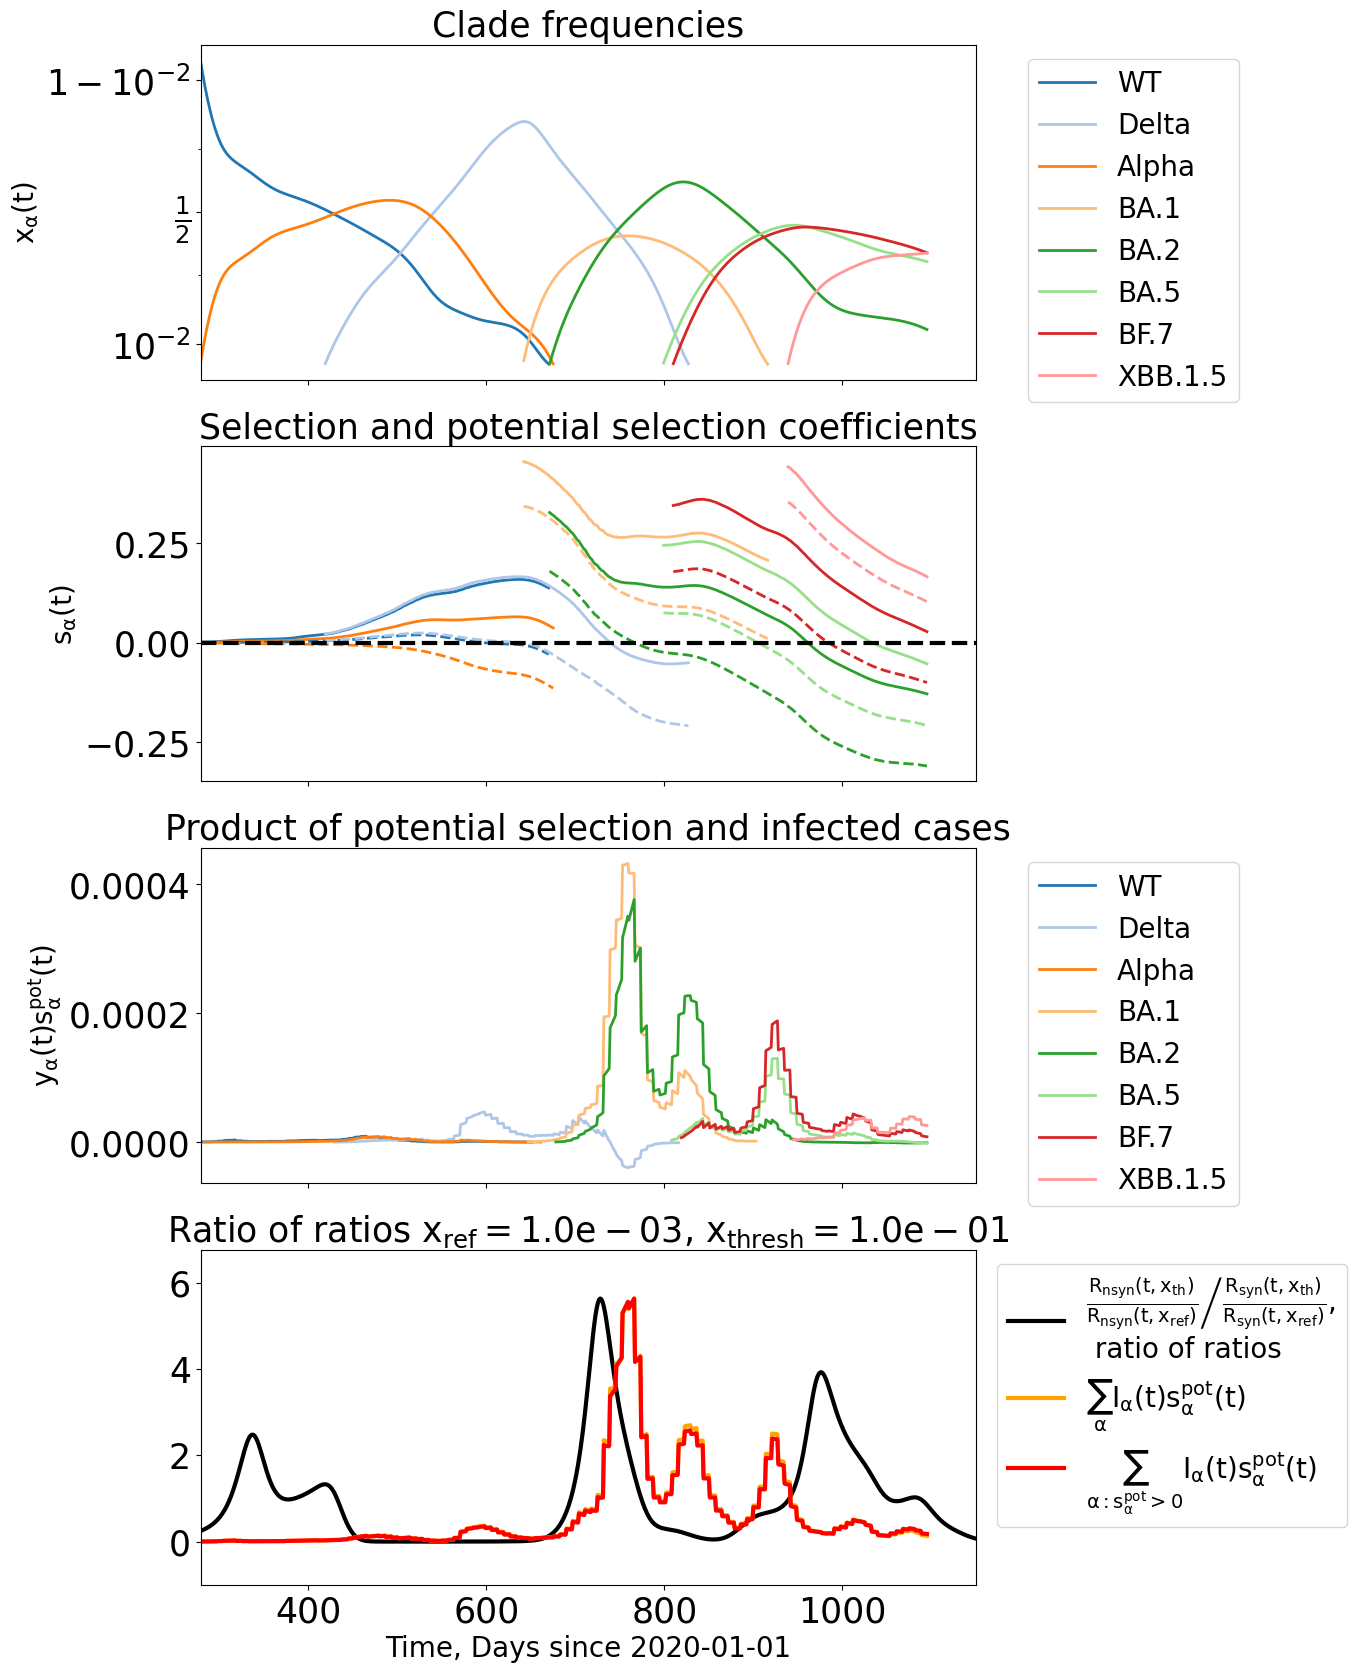

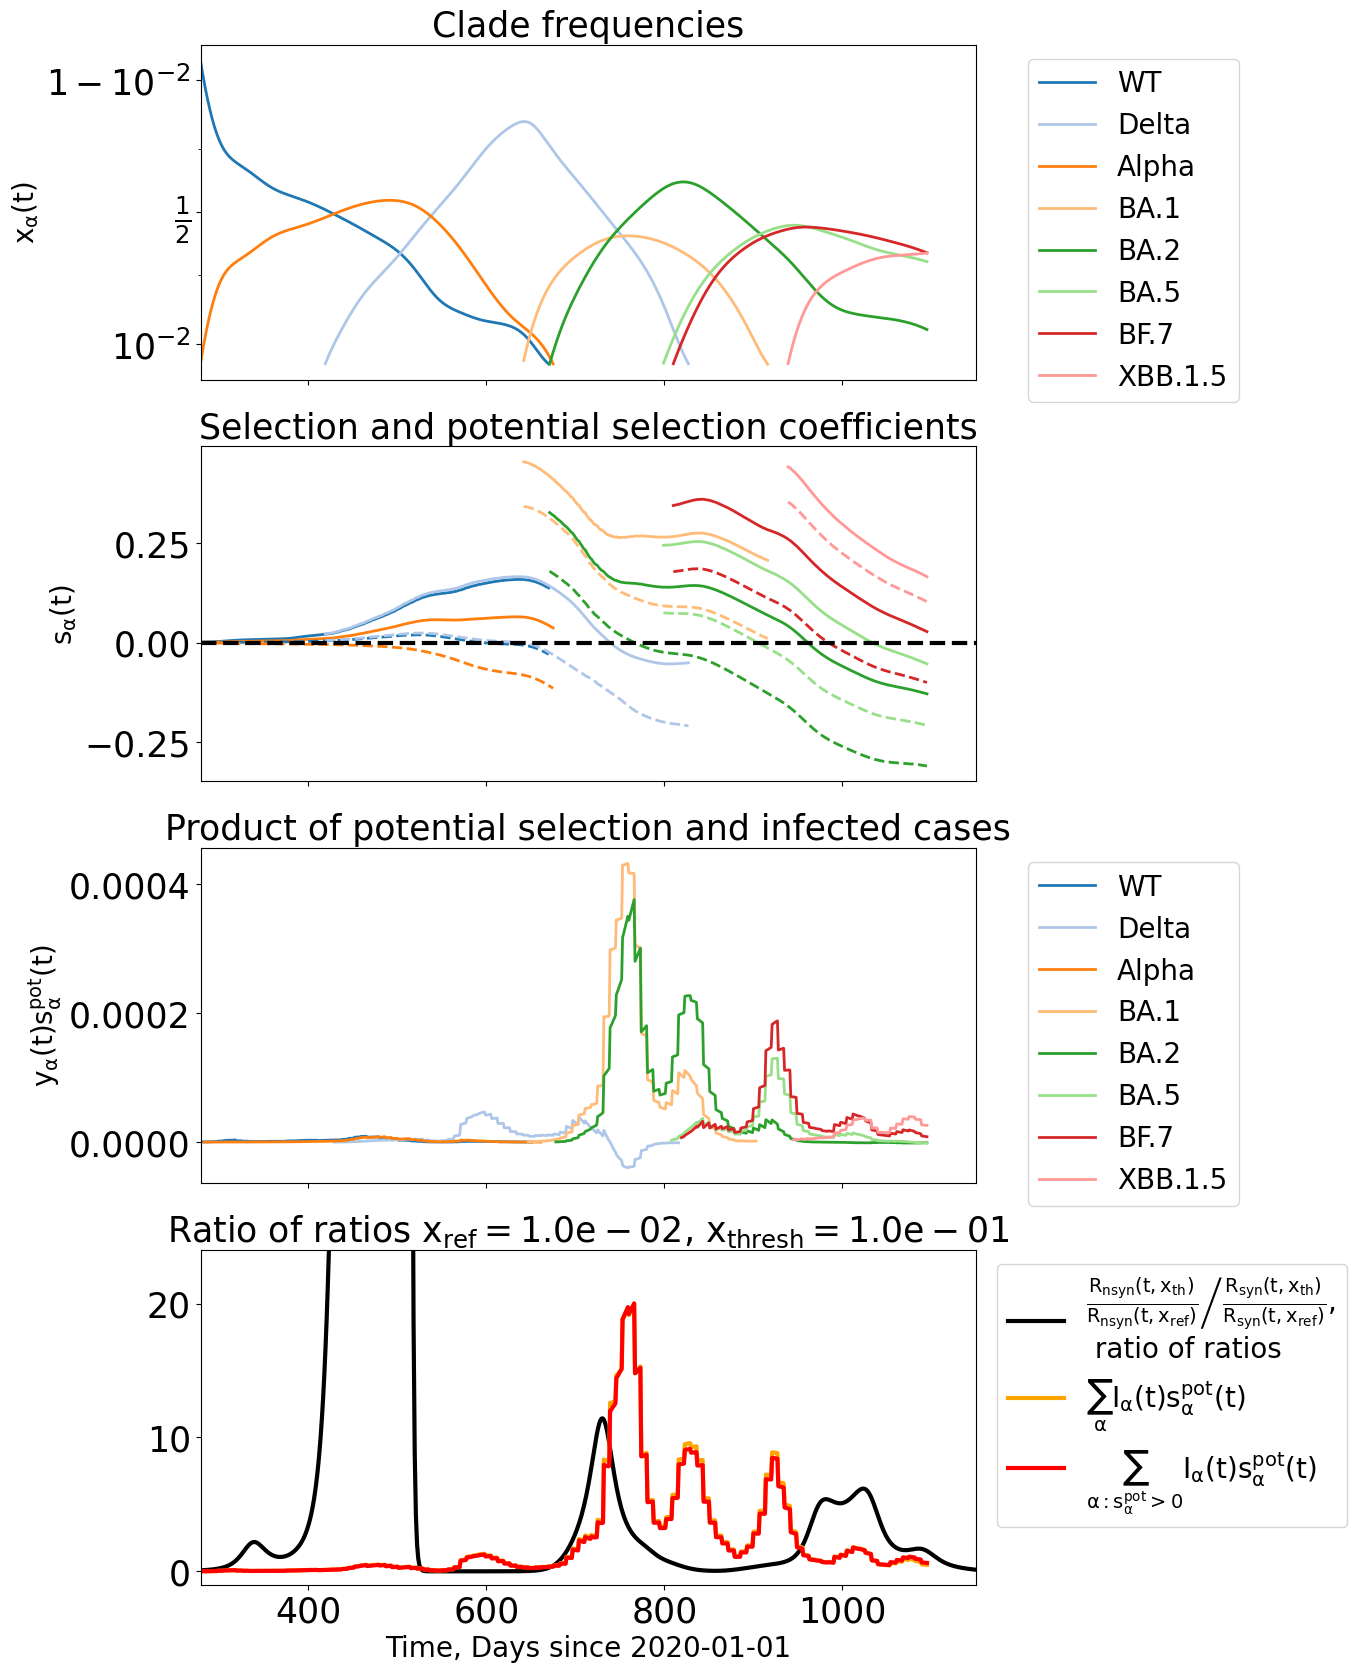

In [45]:
x_thresh_ref = 1e-5
x_thresh = 1e-2

min_freq = 5e-3

for x_thresh_ref in x_thresh_vals[1:]:

    for x_thresh in x_thresh_vals[x_thresh_vals>x_thresh_ref]:

        fig,ax = plt.subplots(4,1,figsize=(10,20),sharex=True)

        sns.lineplot(df_reworked.query(f'freq> {min_freq}'), x= 'day_diff', y= 'freq', hue = 'clade', ax=ax[0], lw=2,palette='tab20',legend=True)

        sns.lineplot(df_reworked.query(f'freq> {min_freq}'), x= 'day_diff', y= 'f_pot', hue = 'clade', ax=ax[1], lw=2,palette='tab20',legend=False)
        sns.lineplot(df_reworked.query(f'freq> {min_freq}'), x= 'day_diff', y= 'fit', hue = 'clade', ax=ax[1], lw=2,palette='tab20',legend=False,ls='--')

        for a in ax:
            a.set_xlim(left=df_reworked.query("clade == 'Alpha' & freq > 5e-3").day_diff.min())

        ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
        ax[0].set_yscale('logit')
        ax[1].axhline(0,color='black',ls='--')


        sns.lineplot(df_reworked.query(f'freq> {min_plotted_freq}'), x= 'day_diff', y= 'pot_s_times_y_t', hue = 'clade', ax=ax[2], lw=2,palette='tab20',)

        ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

        ax[2].set_ylabel(r'$y_\alpha(t)s^\mathrm{pot}_\alpha(t)$',fontsize=20)

        href_syn, bref_syn = np.histogram(syn_clade_stats[f'day_diff_x_bgr_{x_thresh_ref}'].dropna(),bins = hist_ts, density= False)
        hx_syn, bx_syn = np.histogram(syn_clade_stats[f'day_diff_x_bgr_{x_thresh}'].dropna(),bins = hist_ts, density= False)

        href_nonsyn_RBD, bref_nonsyn_RBD = np.histogram(nonsyn_RBD_clade_stats[f'day_diff_x_bgr_{x_thresh_ref}'].dropna(),bins = hist_ts, density= False)

        hx_nonsyn_RBD, bx_nonsyn_RBD = np.histogram(nonsyn_RBD_clade_stats[f'day_diff_x_bgr_{x_thresh}'].dropna(),bins = hist_ts, density= False)

        ratio_nonsyn_RBD = hx_nonsyn_RBD/href_nonsyn_RBD
        ratio_syn = hx_syn/href_syn

        day_diff_with_syn_smooth, smoothed_href_syn = ut.get_kde( syn_clade_stats.query(f'Max_Freq > {x_thresh_ref}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)
        day_diff_with_nonsyn_RBD_smooth, smoothed_href_nonsyn_RBD = ut.get_kde( nonsyn_RBD_clade_stats.query(f'Max_Freq > {x_thresh_ref}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)

        day_diff_with_syn_smooth, smoothed_hx_syn = ut.get_kde( syn_clade_stats.query(f'Max_Freq > {x_thresh}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)
        day_diff_with_nonsyn_RBD_smooth, smoothed_hx_nonsyn_RBD = ut.get_kde( nonsyn_RBD_clade_stats.query(f'Max_Freq > {x_thresh}')['day_diff'], ax =None, bw_adjust=bw, grid_size=1000)

        smoothed_ratio_nonsyn_RBD = smoothed_hx_nonsyn_RBD/smoothed_href_nonsyn_RBD
        smoothed_ratio_syn = smoothed_hx_syn/smoothed_href_syn

        ratio_of_ratios = smoothed_ratio_nonsyn_RBD/smoothed_ratio_syn

        y_times_s_summed = df_reworked.query('f_pot > 0').groupby(['day_diff']).apply(lambda x: np.sum(x['cases']*x['freq']*x['f_pot'])).values
        day_diff_vals = np.sort(df_reworked.query('f_pot > 0').day_diff.unique())

        y_times_s_summed2 = df_reworked.groupby(['day_diff']).apply(lambda x: np.sum(x['cases']*x['freq']*x['f_pot'])).values
        day_diff_vals2 = np.sort(df_reworked.day_diff.unique())


        ax[-1].plot(day_diff_with_syn_smooth, ratio_of_ratios,color= 'black', label = r'$\left.\frac{R_{nsyn}(t,x_\mathrm{th})}{R_{nsyn}(t,x_\mathrm{ref})}\middle/\frac{R_{syn}(t,x_\mathrm{th})}{R_{syn}(t,x_\mathrm{ref})}\right.$,' + '\n ratio of ratios' )

        ax_ratio_of_ratios.axhline(1,color='k',ls='--')

        mmax =np.max(ratio_of_ratios[np.logical_and(~np.isnan(ratio_of_ratios),~np.isinf(ratio_of_ratios))] [:-20])

        mmax = np.min((mmax,20))
        
        ax[-1].plot(day_diff_vals2, y_times_s_summed2/np.max(y_times_s_summed2)* mmax,color='orange'\
                    ,label=r'$\sum_\alpha I_\alpha(t)s^\mathrm{pot}_\alpha(t)$')
        ax[-1].plot(day_diff_vals, y_times_s_summed/np.max(y_times_s_summed)* mmax,color='red' \
                    ,label=r'$\sum_{\alpha : s^\mathrm{pot}_\alpha>0} I_\alpha(t)s^\mathrm{pot}_\alpha(t)$')
        ax[-1].set_ylim(top=1.2*mmax,bottom=-1)

        # ax[-1].set_xlim(left=xlim_center - window_size_left,right=xlim_center + window_size_right)
        ax[0].set_ylabel(r'$x_\alpha(t)$',fontsize=20)
        ax[1].set_ylabel(r'$s_\alpha(t)$',fontsize=20)
        ax[2].set_ylabel(r'$y_\alpha(t)s^\mathrm{pot}_\alpha(t)$',fontsize=20)
        ax[-1].legend(loc='upper left',fontsize=20, bbox_to_anchor=(1.01, 1))   
        ax[-1].set_title(fr' $x_\mathrm{{ref}} = {x_thresh_ref:.1e}$, $x_\mathrm{{thresh}} =  {x_thresh:.1e}$',y=1.1,fontsize=20)

        ax[0].set_title('Clade frequencies',fontsize=25)
        ax[1].set_title('Selection and potential selection coefficients',fontsize=25)
        ax[2].set_title('Product of potential selection and infected cases',fontsize=25)
        ax[3].set_title('Ratio of ratios' + fr' $x_\mathrm{{ref}} = {x_thresh_ref:.1e}$, $x_\mathrm{{thresh}} =  {x_thresh:.1e}$',fontsize=25)

        ax[-1].set_xlabel('Time, Days since 2020-01-01',fontsize=20)
        for a in ax:
            a.tick_params(labelsize=25)
        micro_folder = output_folder+ '/micro_analysis'
        os.makedirs(micro_folder,exist_ok = True)
        savefig=1
        if savefig:
            plt.savefig(micro_folder+f'/micro_analysis_x_th{x_thresh:.1e}_xref_{x_thresh_ref:.1e}.pdf',bbox_inches='tight')



Text(0.5, 0, 'Time, Days since 2020-01-01')

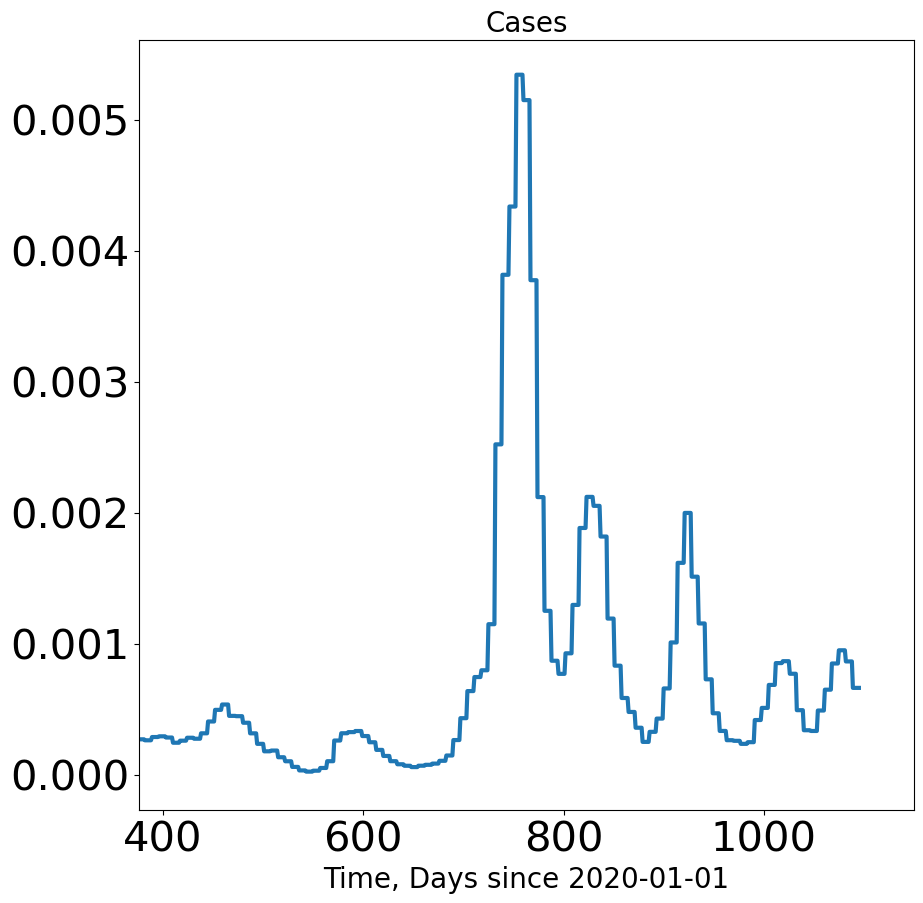

In [58]:
fig,ax = plt.subplots(1,1,figsize=(10,10),sharex=True)

ax.plot((df_reworked.query('clade == "WT"').day_diff),(df_reworked.query('clade == "WT"').cases))

ax.set_xlim(left=376,right=1150)
ax.set_title('Cases',fontsize=20)
ax.set_xlabel('Time, Days since 2020-01-01',fontsize=20)

In [47]:
import scipy.optimize as so

In [48]:
syn_b_counts[np.abs(syn_b_counts- 1e-4)<7e-6], syn_h_counts[np.abs(syn_b_counts[:-1]- 1e-4)<7e-6]

NameError: name 'syn_b_counts' is not defined

fitness_france

In [ ]:
fitness_france_def = pd.read_csv('data/fitness_france_def.txt',sep='\t')

In [ ]:
fitness_france_def

Unnamed: 0  WT_freq  WT_fitness_inf  WT_fitness_vac  WT_F_pot_inf  \
0          43830      1.0        0.000000        0.000000           0.0   
1          43831      1.0        0.000000        0.000000           0.0   
2          43832      1.0        0.000000        0.000000           0.0   
3          43833      1.0        0.000000        0.000000           0.0   
4          43834      1.0        0.000000        0.000000           0.0   
...          ...      ...             ...             ...           ...   
1091       44921      0.0       -0.101276       -0.368705           0.0   
1092       44922      0.0       -0.101285       -0.368844           0.0   
1093       44923      0.0       -0.101295       -0.368918           0.0   
1094       44924      0.0       -0.101305       -0.369115           0.0   
1095       44925      0.0       -0.101318       -0.369406           0.0   

      WT_F_pot_vac  B.1.617.2_freq  B.1.617.2_fitness_inf  \
0              0.0    0.000000e+00               0.000000   
1              0.0    0.000000e+00               0.000000   
2              0.0    0.000000e+00               0.000000   
3              0.0    0.000000e+00               0.000000   
4              0.0    0.000000e+00               0.000000   
...            ...             ...                    ...   
1091           0.0    1.392991e-10              -0.112233   
1092           0.0    8.010394e-11              -0.112195   
1093           0.0    4.532993e-11              -0.112159   
1094           0.0    2.523542e-11              -0.112125   
1095           0.0    1.381648e-11              -0.112090   

      B.1.617.2_fitness_vac  B.1.617.2_F_pot_inf  ...  HV.1_F_pot_inf  \
0                  0.000000                  0.0  ...             0.0   
1                  0.000000                  0.0  ...             0.0   
2                  0.000000                  0.0  ...             0.0   
3                  0.000000                  0.0  ...             0.0   
4                  0.000000                  0.0  ...             0.0   
...                     ...                  ...  ...             ...   
1091              -0.361654                  0.0  ...             0.0   
1092              -0.361789                  0.0  ...             0.0   
1093              -0.361852                  0.0  ...             0.0   
1094              -0.362041                  0.0  ...             0.0   
1095              -0.362334                  0.0  ...             0.0   

      HV.1_F_pot_vac     HK.3_freq  HK.3_fitness_inf  HK.3_fitness_vac  \
0                0.0  0.000000e+00          0.000000          0.000000   
1                0.0  0.000000e+00          0.000000          0.000000   
2                0.0  0.000000e+00          0.000000          0.000000   
3                0.0  0.000000e+00          0.000000          0.000000   
4                0.0  0.000000e+00          0.000000          0.000000   
...              ...           ...               ...               ...   
1091             0.0  1.385787e-18          0.055432          0.093232   
1092             0.0  3.832511e-18          0.055133          0.092396   
1093             0.0  1.035439e-17          0.054832          0.091519   
1094             0.0  2.733918e-17          0.054529          0.090674   
1095             0.0  7.057158e-17          0.054224          0.089820   

      HK.3_F_pot_inf  HK.3_F_pot_vac  av_pot_selection     cases        date  
0                0.0             0.0          0.000000  0.000000  2020-01-01  
1                0.0             0.0          0.000000  0.000000  2020-01-02  
2                0.0             0.0          0.000000  0.000000  2020-01-03  
3                0.0             0.0          0.000000  0.000000  2020-01-04  
4                0.0             0.0          0.000000  0.000000  2020-01-05  
...              ...             ...               ...       ...         ...  
1091             0.0             0.0          0.09486

In [ ]:
u_neutr = 3e-3 #per nucleotide per year
Lg = 3e4 #genome length

U_neutr = u_neutr*Lg *1/3 #per genome per year

In [ ]:
fit

In [ ]:
print(U_neutr)

30.0


In [ ]:
delta_t_weeks = (syn_clade_stats.day_diff.max()-syn_clade_stats.day_diff.min())/7
delta_t_years = delta_t_weeks/52 
print(delta_t_years)

3.620879120879121


In [ ]:
Ieff = syn_h_counts[0]/(U_neutr*delta_t_years)
print(Ieff)

2580.469094587759


x such that ratio>2 for nonsyn RBD: 2.01e-02


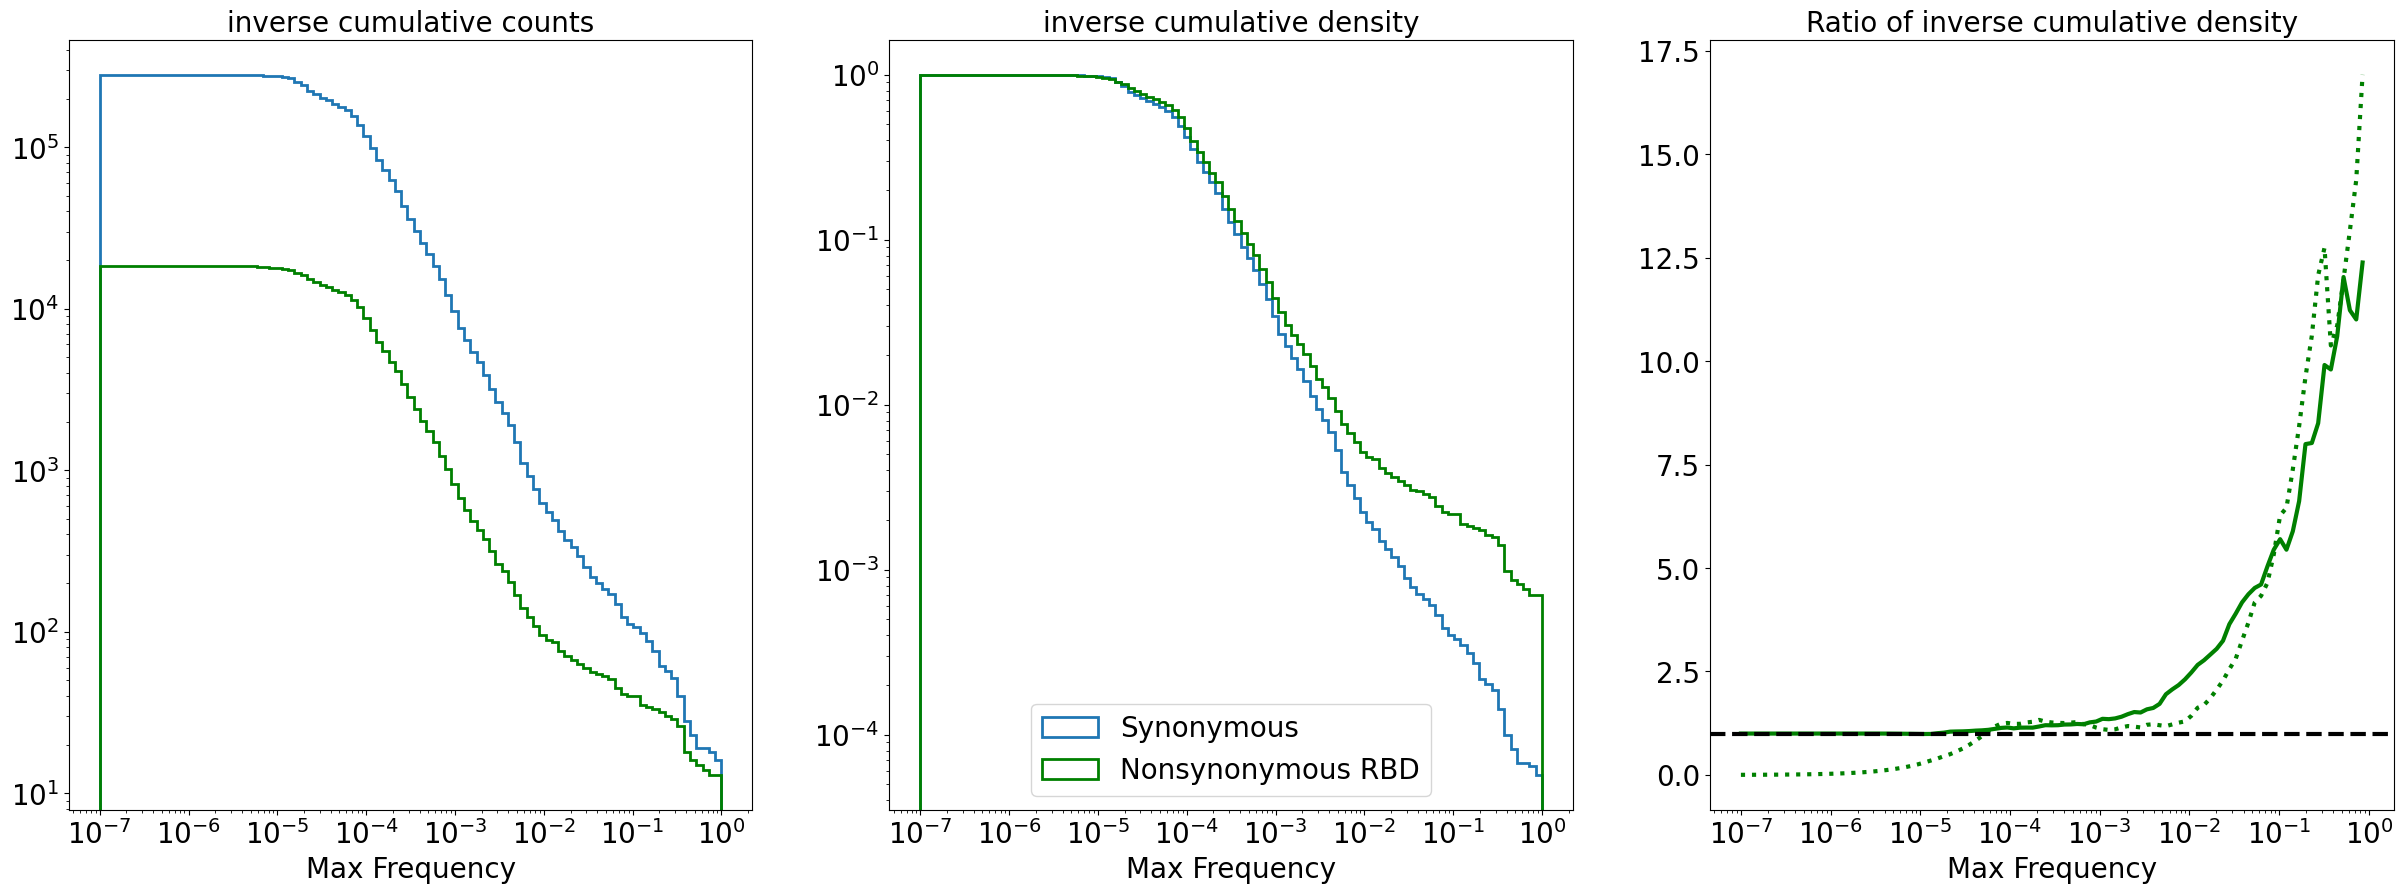

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (30,10))

syn_h_counts,syn_b_counts,syn_p_counts = ax[0].hist(syn_clade_stats['Max_Freq'], bins = np.logspace(-7,0,100), density = False, alpha = 1, lw=2, label = 'Synonymous',cumulative=-1, histtype = 'step')

nonsyn_RBD_h_counts,nonsyn_RBD_b_counts,nonsyn_RBD_p_counts = ax[0].hist(nonsyn_RBD_clade_stats['Max_Freq'], bins = np.logspace(-7,0,100), density = False, alpha = 1, lw=2, label = 'Nonsynonymous RBD',cumulative=-1, histtype = 'step',color='green')

ax[0].set_xscale('log')
ax[0].set_yscale('log')

syn_h,syn_b,syn_p = ax[1].hist(syn_clade_stats['Max_Freq'], bins = np.logspace(-7,0,100), density = True, alpha = 1, lw=2, label = 'Synonymous',cumulative=-1, histtype = 'step')

nonsyn_RBD_h,nonsyn_RBD_b,nonsyn_RBD_p = ax[1].hist(nonsyn_RBD_clade_stats['Max_Freq'], bins = np.logspace(-7,0,100), density = True, alpha = 1, lw=2, label = 'Nonsynonymous RBD',cumulative=-1, histtype = 'step',color='green')

#fit syn with b/(1+a x)
fitfunc = lambda x,a,b: b/(1+a*x)
popt, pcov = so.curve_fit(fitfunc, syn_b[50:-1],syn_h[50:])
a,b = popt
one_over_x_fit = fitfunc(syn_b[:-1],a,b)
# ax[1].plot(syn_b[:-1],one_over_x_fit, label = r'$1/x$',color='steelblue',linestyle='--')
ax[1].legend(loc='best',fontsize=20)
ax[2].plot(syn_b[:-1],nonsyn_RBD_h/syn_h, label = 'Nonsynonymous RBD',color='green')

ax[2].plot(syn_b[:-1],nonsyn_RBD_h/one_over_x_fit,color='green',ls= ':')

print(f'x such that ratio>2 for nonsyn RBD: {syn_b[np.argwhere(nonsyn_RBD_h/one_over_x_fit>2)[0][0]]:.2e}')

# ax[2].set_ylim(.1,15)

ax[2].axhline(1,linestyle='--',color='black')

ax[1].set_xscale('log')
ax[1].set_yscale('log')
# ax[1].set_ylim(10,50)

ax[2].set_xscale('log')

ax[0].set_xlabel('Max Frequency',fontsize=20)
ax[0].set_title('inverse cumulative counts',fontsize=20)

ax[1].set_xlabel('Max Frequency',fontsize=20)
ax[1].set_title('inverse cumulative density',fontsize=20)

ax[2].set_xlabel('Max Frequency',fontsize=20)
ax[2].set_title('Ratio of inverse cumulative density',fontsize=20)
for a in ax:
    a.tick_params(axis='both', which='major', labelsize=20)